In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy import stats
import seaborn as sns

In [3]:
df = pd.read_excel('Daily Update Data Agregat Covid-19 Jakarta.xlsx',sheet_name='Vaksinasi')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [4]:
df

Sasaran Total Indonesia: 181.554.465        Unnamed: 1   Unnamed: 2  \
0    Sasaran Total DKI Jakarta: 8.815.157               NaN          NaN   
1                                 Tanggal               DKI          NaN   
2                                     NaN  Tenaga Kesehatan          NaN   
3                                     NaN  Target Vaksinasi  Vaksinasi 1   
4                     2021-03-05 00:00:00            112301       141425   
5                     2021-03-06 00:00:00            112301       144046   
6                     2021-03-07 00:00:00            112301       177126   
7                     2021-03-08 00:00:00            112301       181237   
8                     2021-03-09 00:00:00            112301       113326   
9                     2021-03-10 00:00:00            112301       116791   
10                    2021-03-11 00:00:00            112301       116823   
11                    2021-03-12 00:00:00            112301       118086   
12                    2021-03-13 00:00:00            112301       118283   
13                    2021-03-14 00:00:00            112301       118301   
14                    2021-03-15 00:00:00            112301       118983   
15                    2021-03-16 00:00:00            112301       119531   
16                    2021-03-17 00:00:00            112301       120003   
17                    2021-03-18 00:00:00            112301       120608   
18                    2021-03-19 00:00:00            112301       121260   
19                    2021-03-20 00:00:00            112301       121373   
20                    2021-03-21 00:00:00            112301       121483   
21                    2021-03-22 00:00:00            112301       121834   
22                    2021-03-23 00:00:00            112301       122199   
23                    2021-03-24 00:00:00            112301       122616   
24                    2021-03-25 00:00:00            112301       122916   
25                    2021-03-26 00:00:00            112301       123199   
26                    2021-03-27 00:00:00            112301       123199   
27                    2021-03-28 00:00:00            112301       123199   
28                    2021-03-29 00:00:00            112301       123199   
29                    2021-03-30 00:00:00            112301       123199   
30                    2021-03-31 00:00:00            112301       123199   
31                    2021-04-01 00:00:00            112301       124396   
32                    2021-04-02 00:00:00            112301       124396   
33                    2021-04-03 00:00:00            112301       121845   
34                    2021-04-04 00:00:00            112301       121850   
35                    2021-04-05 00:00:00            112301       122092   
36                    2021-04-06 00:00:00            112301       122326   
37                    2021-04-07 00:00:00            112301       122553   
38                    2021-04-08 00:00:00            112301       123061   
39                    2021-04-09 00:00:00            112301       123387   
40                    2021-04-10 00:00:00            112301       123474   
41                    2021-04-11 00:00:00            112301       123485   
42                    2021-04-12 00:00:00            112301       123958   
43                    2021-04-13 00:00:00            112301       124255   
44                    2021-04-14 00:00:00            112301       124484   
45                    2021-04-15 00:00:00            112301       124755   
46                    2021-04-16 00:00:00            112301       125148   
47                    2021-04-17 00:00:00            112301       125188   
48                    2021-04-18 00:00:00            112301       125193   
49                    2021-04-19 00:00:00            112301       125459   
50                    2021-04-20 00:00:00            112301       125568   
51                    2021-04-21 00:00:00            

In [5]:
df_tmp = df.copy()
df_tmp.columns = df_tmp.iloc[3]

In [6]:
df_tmp = df_tmp.iloc[4:]
df_tmp = df_tmp.fillna(0)

In [7]:
df_tmp = df_tmp.set_index(df_tanggal)
df_tmp = df_tmp.iloc[:,1:]
df_tmp

NameError: name 'df_tanggal' is not defined

In [8]:
df_tmp.describe()

3      Target Vaksinasi    Vaksinasi 1    Vaksinasi 2  Persentase 1  \
count             127.0     127.000000     127.000000    127.000000   
mean           112301.0  129832.212598  111441.204724      1.156109   
std                 0.0    8783.209998    9393.410135      0.078211   
min            112301.0  113326.000000   89984.000000      1.009127   
25%            112301.0  123721.500000  106987.500000      1.101695   
50%            112301.0  129269.000000  113107.000000      1.151094   
75%            112301.0  135728.000000  120568.000000      1.208609   
max            112301.0  181237.000000  121794.000000      1.613850   

3      Persentase 2  Target Vaksinasi    Vaksinasi 1    Vaksinasi 2  \
count    127.000000             127.0     127.000000     127.000000   
mean       0.992344          911631.0  508995.173228  351199.637795   
std        0.083645               0.0  143027.378411  215958.507641   
min        0.801275          911631.0   76451.000000       0.000000   
25%        0.952685          911631.0  494902.000000  117065.500000   
50%        1.007177          911631.0  581932.000000  482803.000000   
75%        1.073615          911631.0  593442.000000  534888.000000   
max        1.084532          911631.0  599877.000000  535273.000000   

3      Persentase 1  Persentase 2  Target Vaksinasi   Vaksinasi 1  \
count    127.000000    127.000000             127.0  1.270000e+02   
mean       0.558335      0.385243         1976757.0  1.545802e+06   
std        0.156892      0.236892               0.0  1.081747e+06   
min        0.083862      0.000000         1976757.0  6.412100e+04   
25%        0.542875      0.128413         1976757.0  7.840545e+05   
50%        0.638342      0.529604         1976757.0  1.388224e+06   
75%        0.650967      0.586737         1976757.0  1.915026e+06   
max        0.658026      0.587160         1976757.0  4.651990e+06   

3       Vaksinasi 2  Persentase 1  Persentase 2  Target Vaksinasi  \
count  1.270000e+02    127.000000    127.000000      1.270000e+02   
mean   7.312924e+05      0.781989      0.369946      4.007920e+06   
std    4.445635e+05      0.547233      0.224895      2.209168e+06   
min    0.000000e+00      0.032437      0.000000      3.000689e+06   
25%    3.402315e+05      0.396637      0.172116      3.000689e+06   
50%    7.992760e+05      0.702273      0.404337      3.000689e+06   
75%    1.193738e+06      0.968772      0.603887      3.000689e+06   
max    1.293428e+06      2.353344      0.654318      8.815157e+06   

3       Vaksinasi 1   Vaksinasi 2  Persentase 1  Persentase 2    Vaksinasi 1  \
count  1.270000e+02  1.270000e+02    127.000000    127.000000     127.000000   
mean   2.184629e+06  1.193804e+06      0.567322      0.324920   19745.464567   
std    1.182421e+06  6.619285e+05      0.229479      0.197230   45130.389468   
min    2.819970e+05  9.107800e+04      0.093977      0.030352       0.000000   
25%    1.401166e+06  5.635340e+05      0.414987      0.187802       0.000000   
50%    2.099049e+06  1.395186e+06      0.556060      0.271167       0.000000   
75%    2.644196e+06  1.845698e+06      0.733409      0.498852       0.000000   
max    5.388600e+06  1.950495e+06      1.043644      0.624913  226905.000000   

3      Vaksinasi 2  Target Vaksinasi   Vaksinasi 1   Vaksinasi 2  \
count   127.000000      1.270000e+02  1.270000e+02  1.270000e+02   
mean    593.102362      1.369115e+06  6.259955e+05  2.390215e+05   
std    1463.107059      3.002892e+06  1.397601e+06  5.243234e+05   
min       0.000000      0.000000e+00  0.000000e+00  0.000000e+00   
25%       0.000000      0.000000e+00  0.000000e+00  0.000000e+00   
50%       0.000000      0.000000e+00  0.000000e+00  0.000000e+00   
75%       0.000000      0.000000e+00  0.000000e+00  0.000000e+00   
max    5826.000000      7.903526e+06  4.705939e+06  1.415222e+06   

3      Persentase 1  Persentase 2  Target Vaksinasi   Vaksinasi 1  \
count    127.000000    127.000000         127.00000    127.000000   
mean

In [9]:
df_tanggal = df.iloc[4:,0]
df_tanggal.rename('Tanggal',inplace=True)
df_tanggal

4      2021-03-05 00:00:00
5      2021-03-06 00:00:00
6      2021-03-07 00:00:00
7      2021-03-08 00:00:00
8      2021-03-09 00:00:00
9      2021-03-10 00:00:00
10     2021-03-11 00:00:00
11     2021-03-12 00:00:00
12     2021-03-13 00:00:00
13     2021-03-14 00:00:00
14     2021-03-15 00:00:00
15     2021-03-16 00:00:00
16     2021-03-17 00:00:00
17     2021-03-18 00:00:00
18     2021-03-19 00:00:00
19     2021-03-20 00:00:00
20     2021-03-21 00:00:00
21     2021-03-22 00:00:00
22     2021-03-23 00:00:00
23     2021-03-24 00:00:00
24     2021-03-25 00:00:00
25     2021-03-26 00:00:00
26     2021-03-27 00:00:00
27     2021-03-28 00:00:00
28     2021-03-29 00:00:00
29     2021-03-30 00:00:00
30     2021-03-31 00:00:00
31     2021-04-01 00:00:00
32     2021-04-02 00:00:00
33     2021-04-03 00:00:00
34     2021-04-04 00:00:00
35     2021-04-05 00:00:00
36     2021-04-06 00:00:00
37     2021-04-07 00:00:00
38     2021-04-08 00:00:00
39     2021-04-09 00:00:00
40     2021-04-10 00:00:00
4

In [10]:
df_nakesjkt = df.iloc[4:,1:6]
df_nakesjkt.columns = df.iloc[3,1:6]
df_nakesjkt = df_nakesjkt.set_index(df_tanggal)
df_nakesjkt

3          Target Vaksinasi Vaksinasi 1 Vaksinasi 2 Persentase 1 Persentase 2
Tanggal                                                                      
2021-03-05           112301      141425       91078     1.259339     0.811017
2021-03-06           112301      144046       91379     1.282678     0.813697
2021-03-07           112301      177126       91460     1.577243     0.814418
2021-03-08           112301      181237       92988      1.61385     0.828025
2021-03-09           112301      113326       89984     1.009127     0.801275
2021-03-10           112301      116791       90681     1.039982     0.807482
2021-03-11           112301      116823       90693     1.040267     0.807589
2021-03-12           112301      118086       91521     1.051513     0.814962
2021-03-13           112301      118283       91748     1.053268     0.816983
2021-03-14           112301      118301       91764     1.053428     0.817125
2021-03-15           112301      118983       92579     1.059501     0.824383
2021-03-16           112301      119531       93559     1.064381     0.833109
2021-03-17           112301      120003       94619     1.068584     0.842548
2021-03-18           112301      120608       99980     1.073971     0.890286
2021-03-19           112301      121260       97465     1.079777     0.867891
2021-03-20           112301      121373       97612     1.080783       0.8692
2021-03-21           112301      121483       97660     1.081762     0.869627
2021-03-22           112301      121834       98956     1.084888     0.881168
2021-03-23           112301      122199      100218     1.088138     0.892405
2021-03-24           112301      122616      101248     1.091851     0.901577
2021-03-25           112301      122916      101602     1.094523     0.904729
2021-03-26           112301      123199      102584     1.097043     0.913474
2021-03-27           112301      123199      102672     1.097043     0.914257
2021-03-28           112301      123199      102692     1.097043     0.914435
2021-03-29           112301      123199      103537     1.097043      0.92196
2021-03-30           112301      123199      104246     1.097043     0.928273
2021-03-31           112301      123199      104773     1.097043     0.932966
2021-04-01           112301      124396      107368     1.107702     0.956073
2021-04-02           112301      124396      107368     1.107702     0.956073
2021-04-03           112301      121845      105485     1.084986     0.939306
2021-04-04           112301      121850      105514      1.08503     0.939564
2021-04-05           112301      122092      106037     1.087185     0.944221
2021-04-06           112301      122326      106437     1.089269     0.947783
2021-04-07           112301      122553      106800      1.09129     0.951016
2021-04-08           112301      123061      107175     1.095814     0.954355
2021-04-09           112301      123387      107509     1.098717     0.957329
2021-04-10           112301      123474      107573     1.099492     0.957899
2021-04-11           112301      123485      107583     1.099589     0.957988
2021-04-12           112301      123958      107968     1.103801     0.961416
2021-04-13           112301      124255      108205     1.106446     0.963527
2021-04-14           112301      124484      108418     1.108485     0.965423
2021-04-15           112301      124755      108761     1.110898     0.968478
2021-04-16           112301      125148      109038     1.114398     0.970944
2021-04-17           112301      125188      109105     1.114754     0.971541
2021-04-18           112301      125193      109105     1.114799     0.971541
2021-04-19           112301      125459      109299     1.117167     0.973268
2021-04-20           112301      125568      109421     1.118138     0.974355
2021-04-21           112301      125808      109615     1.120275     0.976082
2021-04-22           112301      126323      109990     1.124861     0.979421
2021-04-23           1

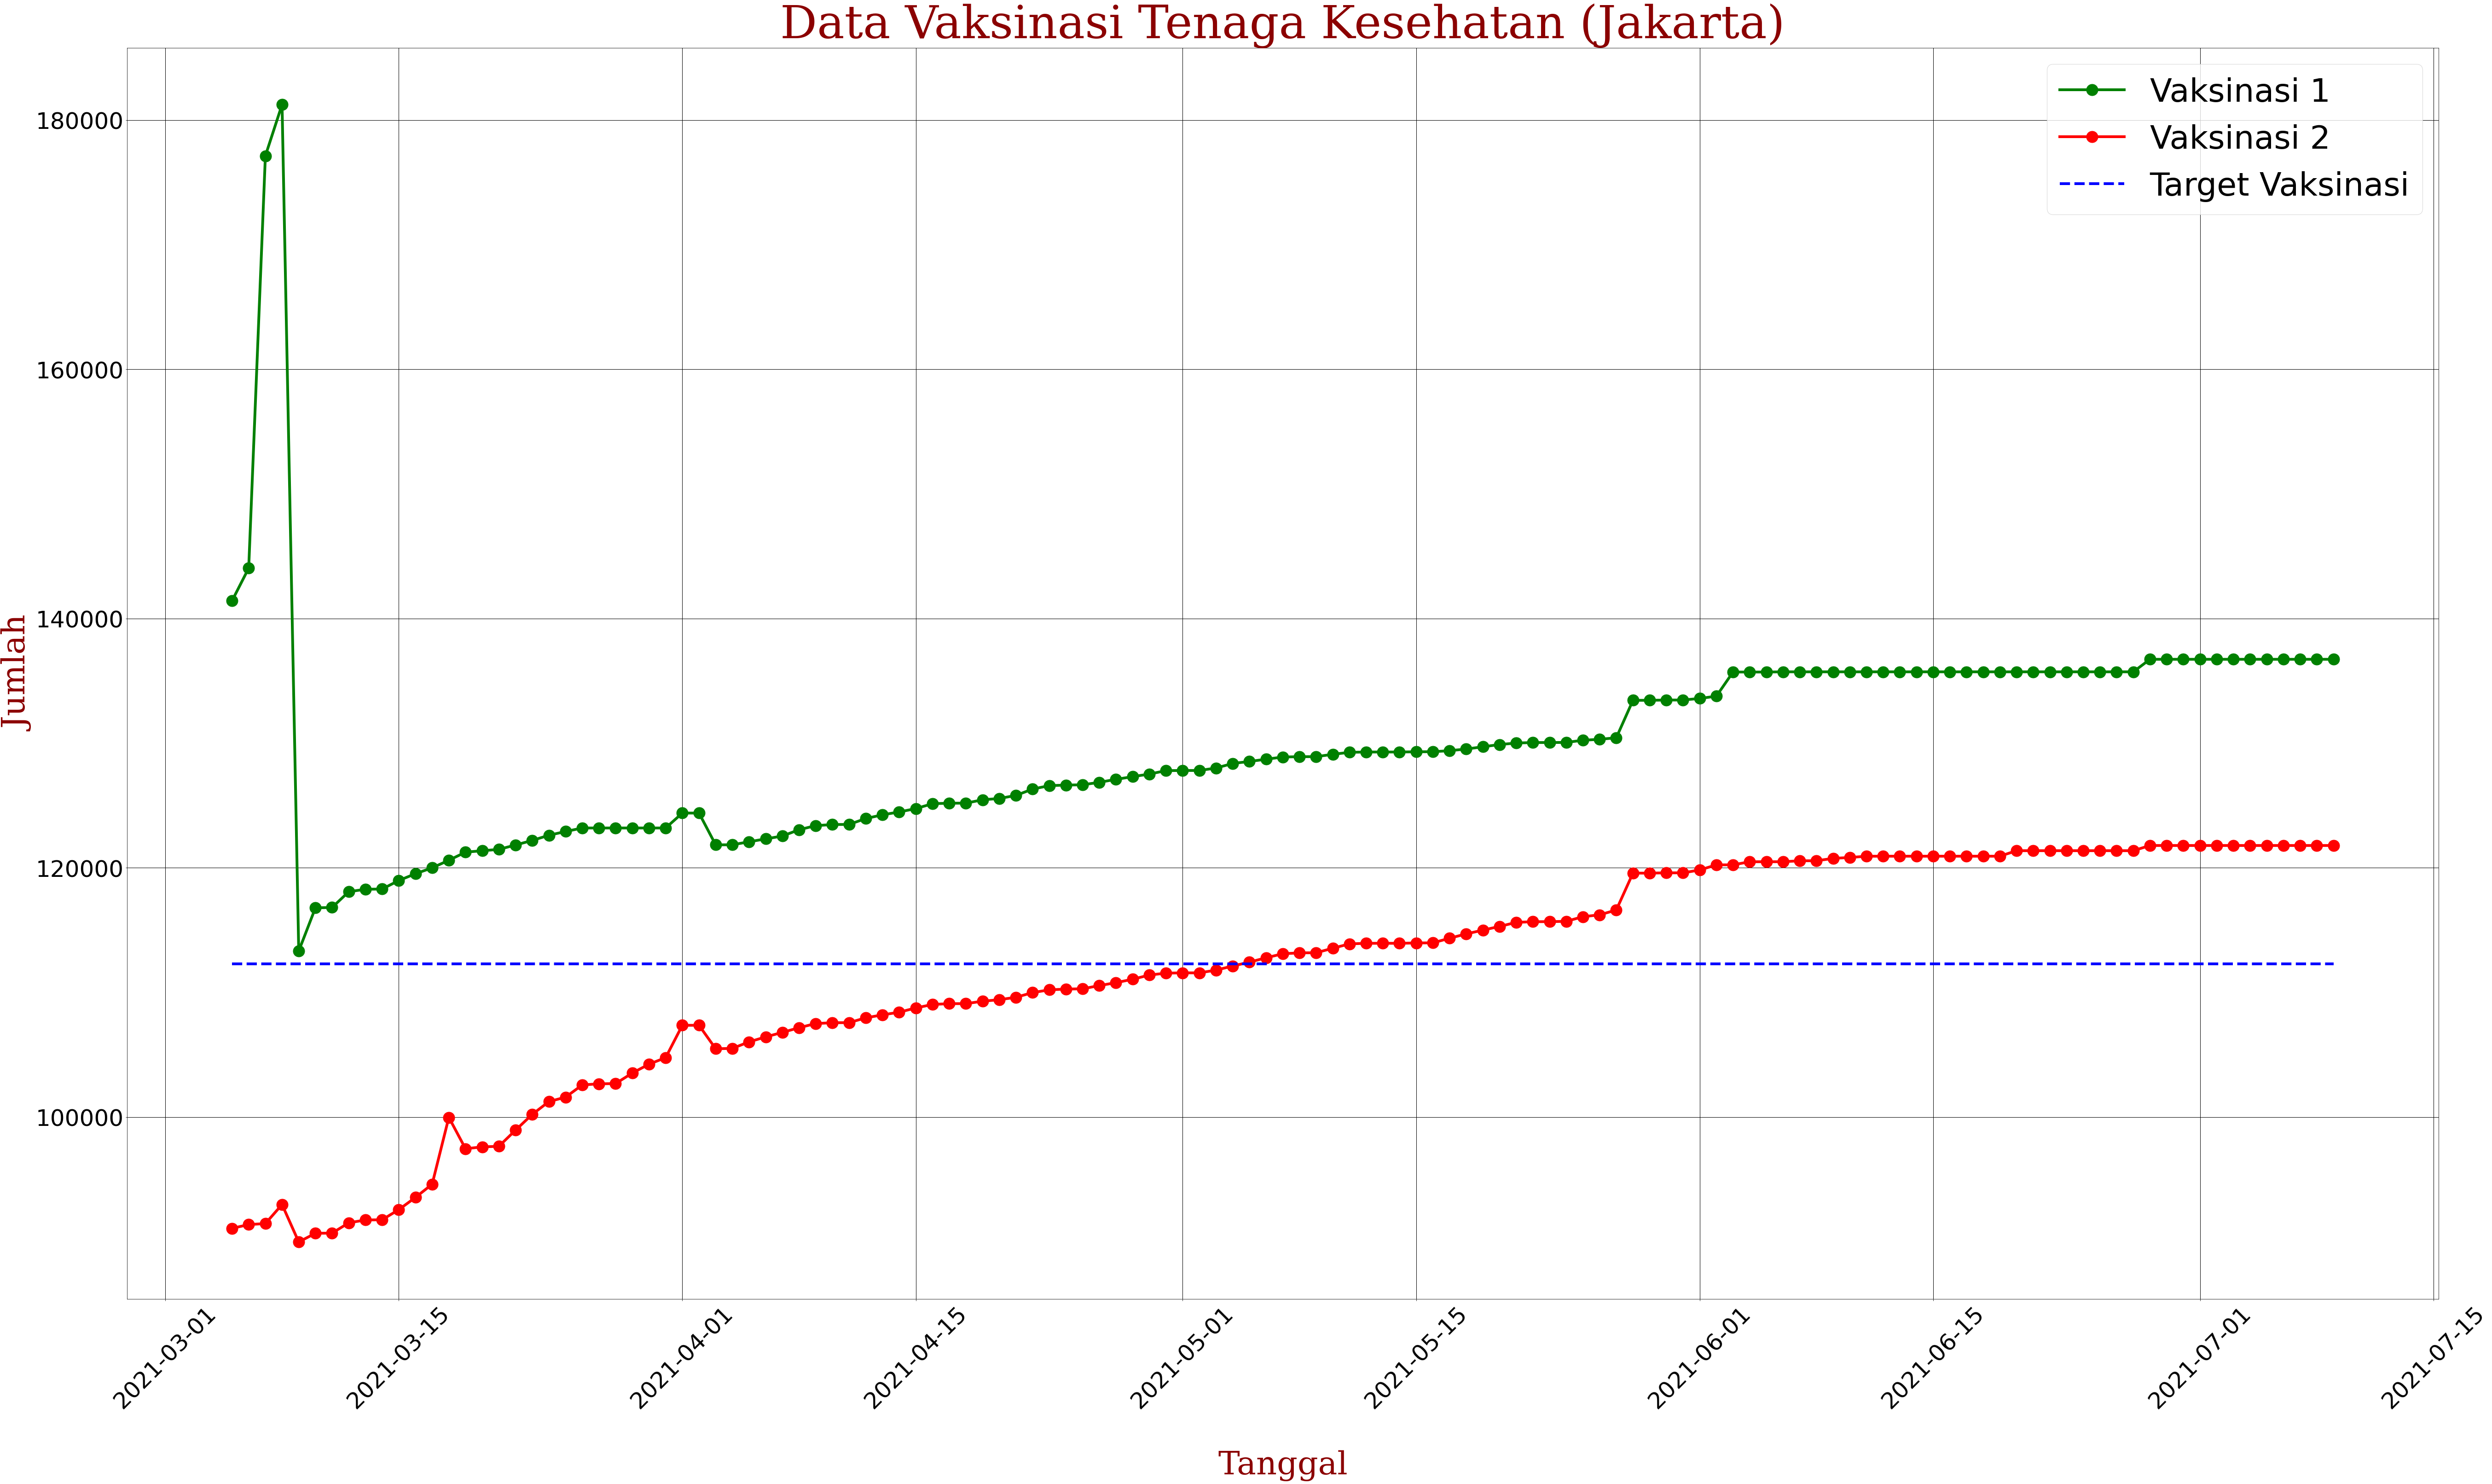

In [11]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

fig, ax = plt.subplots(figsize=(90,50))
ax.plot(df_nakesjkt['Vaksinasi 1'],label = 'Vaksinasi 1',marker="o",markersize=25,color='g',linewidth=6)
ax.plot(df_nakesjkt['Vaksinasi 2'],label = 'Vaksinasi 2',marker="o",markersize=25,color='r',linewidth=6)
ax.plot(df_nakesjkt['Target Vaksinasi'],label = 'Target Vaksinasi',linestyle='--',color='b',linewidth=6)
plt.setp(ax.get_xticklabels(), rotation = 45,fontsize=50)
plt.setp(ax.get_yticklabels(),fontsize=50)
ax.yaxis.offsetText.set_fontsize(50)
ax.legend(prop={'size': 70})
plt.title('Data Vaksinasi Tenaga Kesehatan (Jakarta)',fontsize=100,fontdict=font)
plt.xlabel('\nTanggal',size = 70,fontdict=font)
plt.ylabel('Jumlah',size = 70,fontdict=font)
ax.grid(linewidth=1,color='black',b=True)

In [12]:
df_lansiajkt = df.iloc[4:,6:11]
df_lansiajkt.columns = df.iloc[3,6:11]
df_lansiajkt = df_nakesjkt.set_index(df_tanggal)
df_lansiajkt

3          Target Vaksinasi Vaksinasi 1 Vaksinasi 2 Persentase 1 Persentase 2
Tanggal                                                                      
2021-03-05           112301      141425       91078     1.259339     0.811017
2021-03-06           112301      144046       91379     1.282678     0.813697
2021-03-07           112301      177126       91460     1.577243     0.814418
2021-03-08           112301      181237       92988      1.61385     0.828025
2021-03-09           112301      113326       89984     1.009127     0.801275
2021-03-10           112301      116791       90681     1.039982     0.807482
2021-03-11           112301      116823       90693     1.040267     0.807589
2021-03-12           112301      118086       91521     1.051513     0.814962
2021-03-13           112301      118283       91748     1.053268     0.816983
2021-03-14           112301      118301       91764     1.053428     0.817125
2021-03-15           112301      118983       92579     1.059501     0.824383
2021-03-16           112301      119531       93559     1.064381     0.833109
2021-03-17           112301      120003       94619     1.068584     0.842548
2021-03-18           112301      120608       99980     1.073971     0.890286
2021-03-19           112301      121260       97465     1.079777     0.867891
2021-03-20           112301      121373       97612     1.080783       0.8692
2021-03-21           112301      121483       97660     1.081762     0.869627
2021-03-22           112301      121834       98956     1.084888     0.881168
2021-03-23           112301      122199      100218     1.088138     0.892405
2021-03-24           112301      122616      101248     1.091851     0.901577
2021-03-25           112301      122916      101602     1.094523     0.904729
2021-03-26           112301      123199      102584     1.097043     0.913474
2021-03-27           112301      123199      102672     1.097043     0.914257
2021-03-28           112301      123199      102692     1.097043     0.914435
2021-03-29           112301      123199      103537     1.097043      0.92196
2021-03-30           112301      123199      104246     1.097043     0.928273
2021-03-31           112301      123199      104773     1.097043     0.932966
2021-04-01           112301      124396      107368     1.107702     0.956073
2021-04-02           112301      124396      107368     1.107702     0.956073
2021-04-03           112301      121845      105485     1.084986     0.939306
2021-04-04           112301      121850      105514      1.08503     0.939564
2021-04-05           112301      122092      106037     1.087185     0.944221
2021-04-06           112301      122326      106437     1.089269     0.947783
2021-04-07           112301      122553      106800      1.09129     0.951016
2021-04-08           112301      123061      107175     1.095814     0.954355
2021-04-09           112301      123387      107509     1.098717     0.957329
2021-04-10           112301      123474      107573     1.099492     0.957899
2021-04-11           112301      123485      107583     1.099589     0.957988
2021-04-12           112301      123958      107968     1.103801     0.961416
2021-04-13           112301      124255      108205     1.106446     0.963527
2021-04-14           112301      124484      108418     1.108485     0.965423
2021-04-15           112301      124755      108761     1.110898     0.968478
2021-04-16           112301      125148      109038     1.114398     0.970944
2021-04-17           112301      125188      109105     1.114754     0.971541
2021-04-18           112301      125193      109105     1.114799     0.971541
2021-04-19           112301      125459      109299     1.117167     0.973268
2021-04-20           112301      125568      109421     1.118138     0.974355
2021-04-21           112301      125808      109615     1.120275     0.976082
2021-04-22           112301      126323      109990     1.124861     0.979421
2021-04-23           1

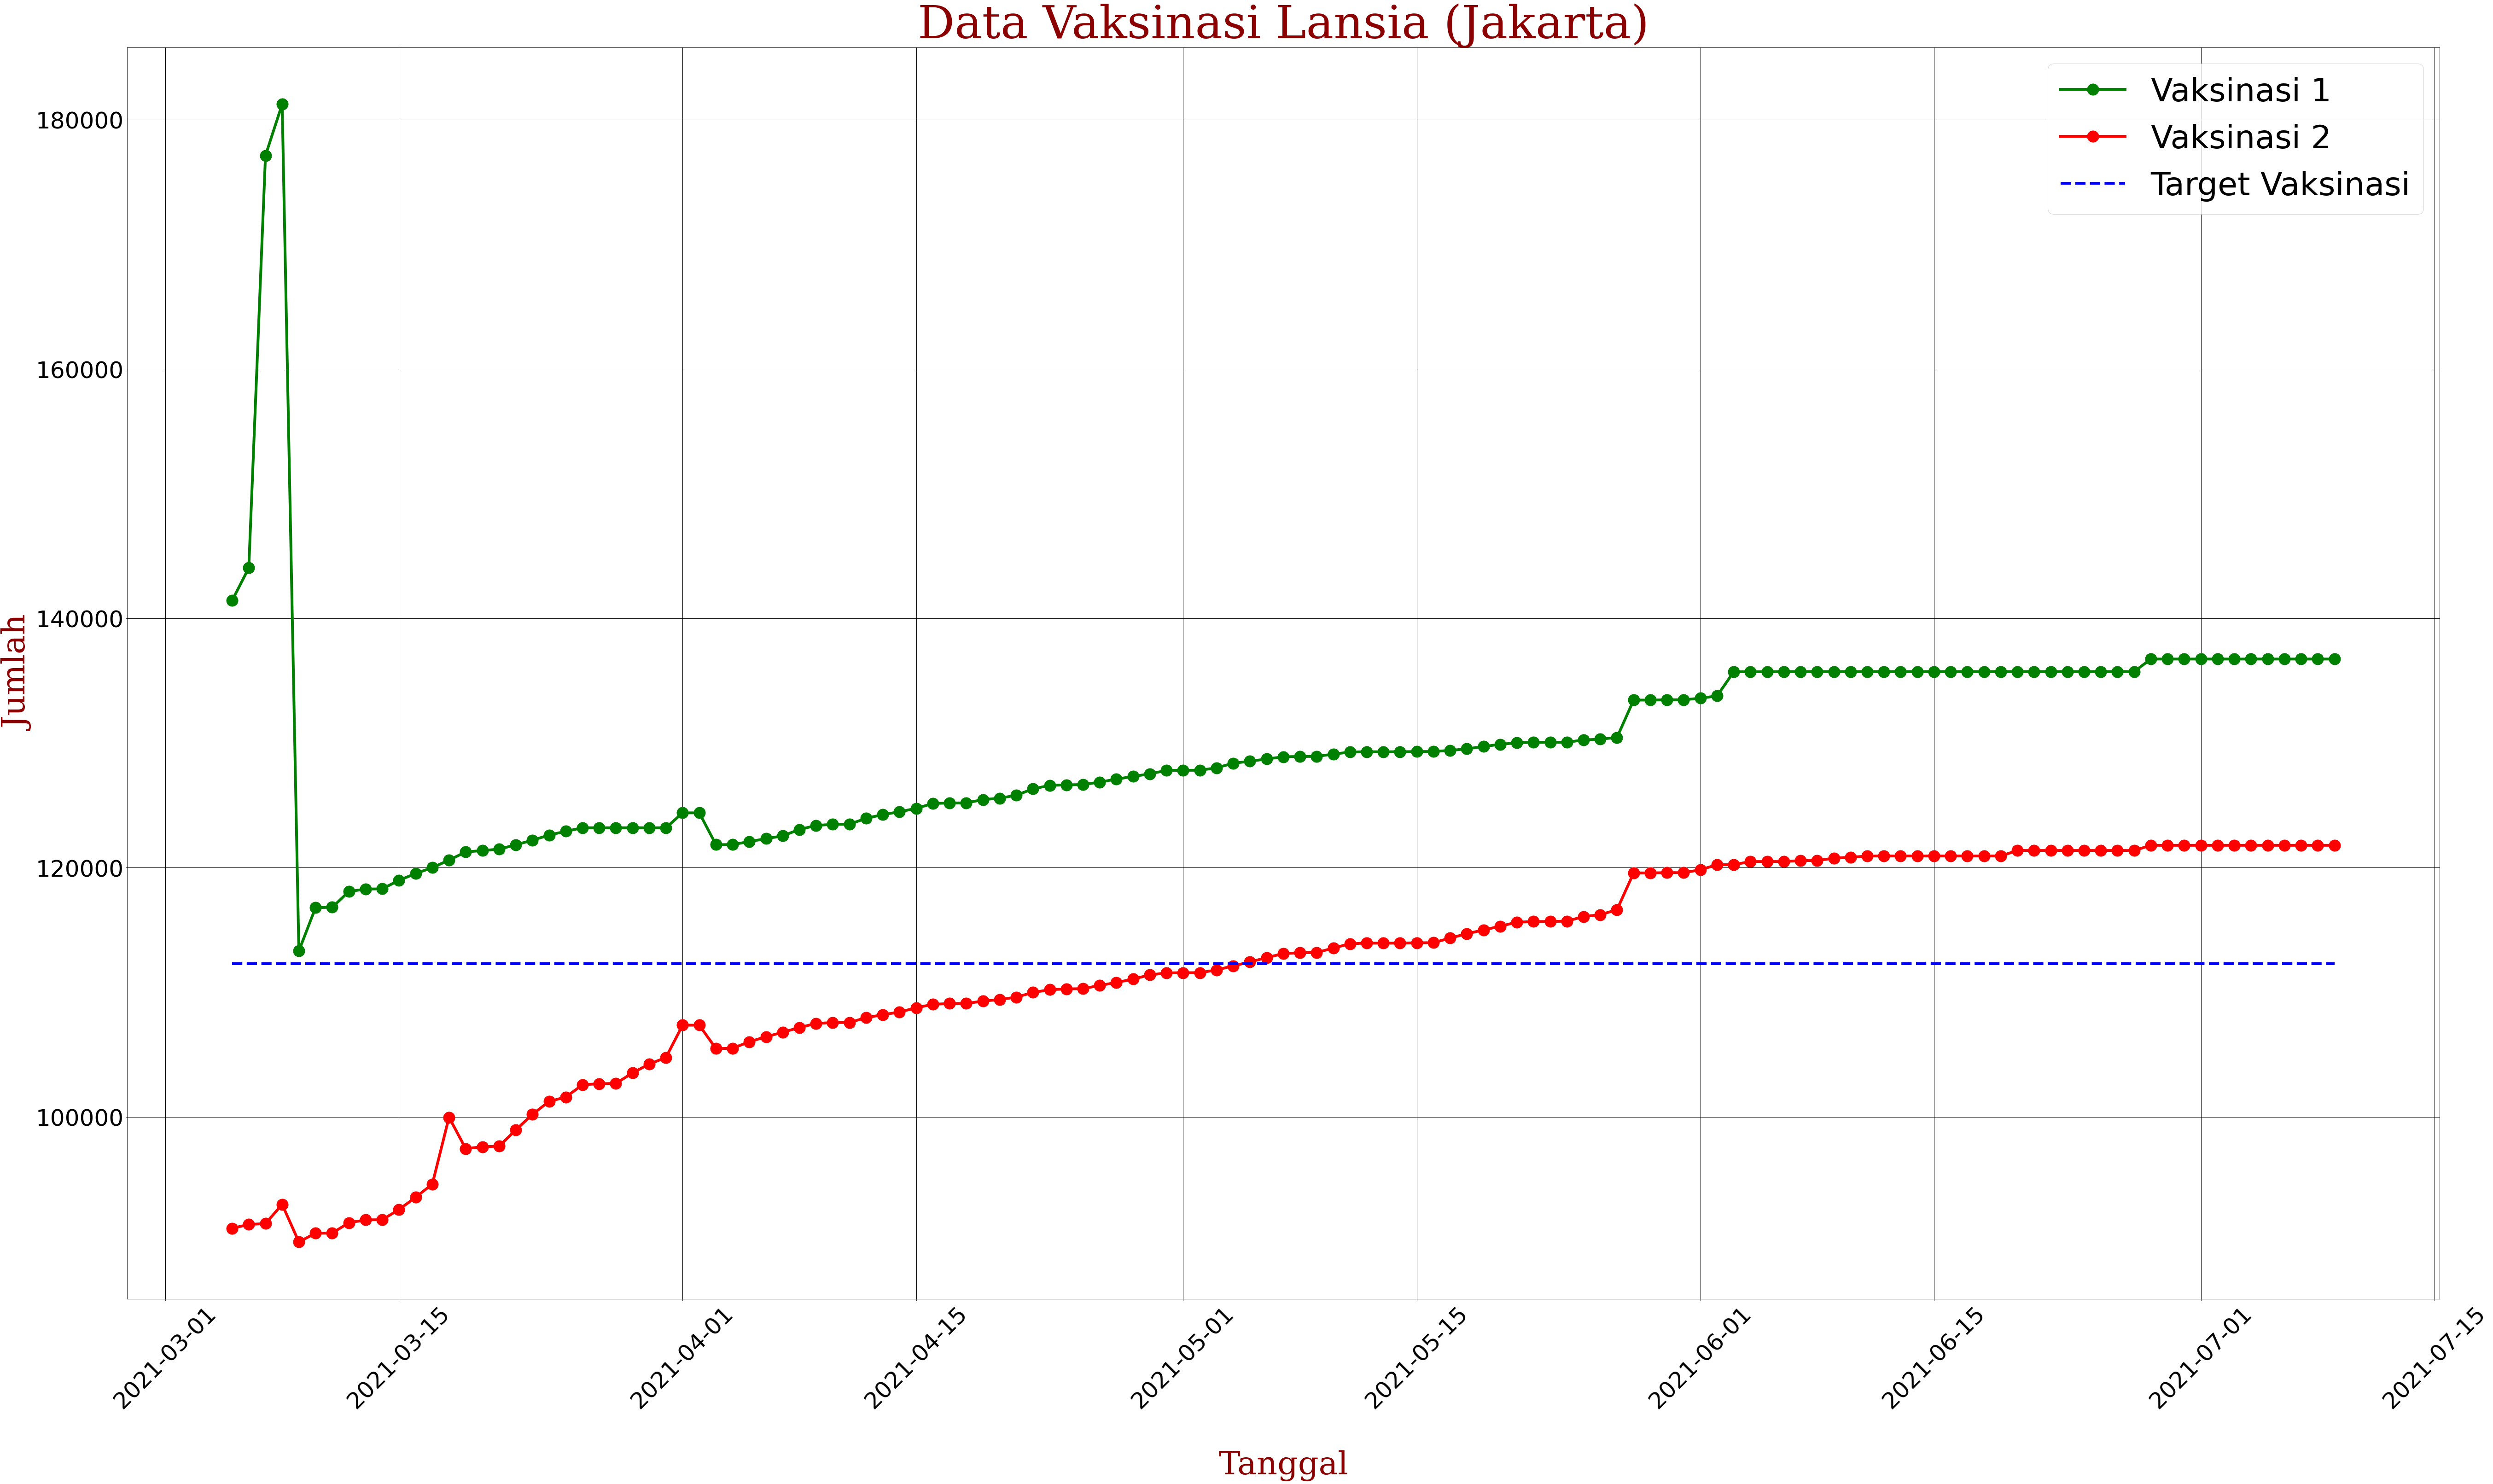

In [13]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

fig, ax = plt.subplots(figsize=(90,50))
ax.plot(df_lansiajkt['Vaksinasi 1'],label = 'Vaksinasi 1',marker="o",markersize=25,color='g',linewidth=6)
ax.plot(df_lansiajkt['Vaksinasi 2'],label = 'Vaksinasi 2',marker="o",markersize=25,color='r',linewidth=6)
ax.plot(df_lansiajkt['Target Vaksinasi'],label = 'Target Vaksinasi',linestyle='--',color='b',linewidth=6)
plt.setp(ax.get_xticklabels(), rotation = 45,fontsize=50)
plt.setp(ax.get_yticklabels(),fontsize=50)
ax.yaxis.offsetText.set_fontsize(50)
ax.legend(prop={'size': 70})
plt.title('Data Vaksinasi Lansia (Jakarta)',fontsize=100,fontdict=font)
plt.xlabel('\nTanggal',size = 70,fontdict=font)
plt.ylabel('Jumlah',size = 70,fontdict=font)
ax.grid(linewidth=1,color='black',b=True)

In [14]:
df_ppjkt = df.iloc[4:,11:16]
df_ppjkt.columns = df.iloc[3,11:16]
df_ppjkt = df_ppjkt.set_index(df_tanggal)
df_ppjkt

3          Target Vaksinasi Vaksinasi 1 Vaksinasi 2 Persentase 1 Persentase 2
Tanggal                                                                      
2021-03-05          1976757       64121           0     0.032437            0
2021-03-06          1976757       66484           0     0.033633            0
2021-03-07          1976757       73752        2514      0.03731     0.001272
2021-03-08          1976757       85333        3989     0.043168     0.002018
2021-03-09          1976757      174685       29195     0.088369     0.014769
2021-03-10          1976757      202452       17773     0.102416     0.008991
2021-03-11          1976757      211754       17903     0.107122     0.009057
2021-03-12          1976757      234403       20226      0.11858     0.010232
2021-03-13          1976757      245355       21272      0.12412     0.010761
2021-03-14          1976757      252763       21413     0.127868     0.010832
2021-03-15          1976757      282970       29871     0.143149     0.015111
2021-03-16          1976757      312415       43891     0.158044     0.022204
2021-03-17          1976757      336132       63154     0.170042     0.031948
2021-03-18          1976757      356592       82412     0.180392     0.041691
2021-03-19          1976757      409121       99709     0.206966     0.050441
2021-03-20          1976757      415447      103069     0.210166      0.05214
2021-03-21          1976757      428256      103939     0.216646     0.052581
2021-03-22          1976757      443083      124036     0.224146     0.062747
2021-03-23          1976757      465428      148494      0.23545      0.07512
2021-03-24          1976757      501557      177455     0.253727     0.089771
2021-03-25          1976757      529155      187424     0.267688     0.094814
2021-03-26          1976757      554981      211347     0.280753     0.106916
2021-03-27          1976757      573482      217379     0.290113     0.109967
2021-03-28          1976757      585999      219264     0.296445     0.110921
2021-03-29          1976757      610227      242034     0.308701      0.12244
2021-03-30          1976757      636631      266245     0.322058     0.134688
2021-03-31          1976757      668989      287470     0.338428     0.145425
2021-04-01          1976757      699688      300935     0.353958     0.152237
2021-04-02          1976757      715419      302306     0.361916      0.15293
2021-04-03          1976757      730364      305602     0.369476     0.154598
2021-04-04          1976757      742355      308776     0.375542     0.156203
2021-04-05          1976757      771861      330815     0.390468     0.167352
2021-04-06          1976757      796248      349648     0.402805      0.17688
2021-04-07          1976757      813740      369813     0.411654     0.187081
2021-04-08          1976757      844961      388298     0.427448     0.196432
2021-04-09          1976757      866503      402918     0.438346     0.203828
2021-04-10          1976757      880884      406805     0.445621     0.205794
2021-04-11          1976757      887215      412014     0.448824     0.208429
2021-04-12          1976757      907936      424562     0.459306     0.214777
2021-04-13          1976757      918905      430157     0.464855     0.217607
2021-04-14          1976757      930601      443508     0.470772     0.224361
2021-04-15          1976757      944880      452555     0.477995     0.228938
2021-04-16          1976757      959985      458619     0.485636     0.232006
2021-04-17          1976757      967733      461648     0.489556     0.233538
2021-04-18          1976757      971708      466276     0.491567     0.235879
2021-04-19          1976757      990548      475981     0.501098     0.240789
2021-04-20          1976757     1007563      481378     0.509705     0.243519
2021-04-21          1976757     1025472      493120     0.518765     0.249459
2021-04-22          1976757     1058587      515356     0.535517     0.260708
2021-04-23          19

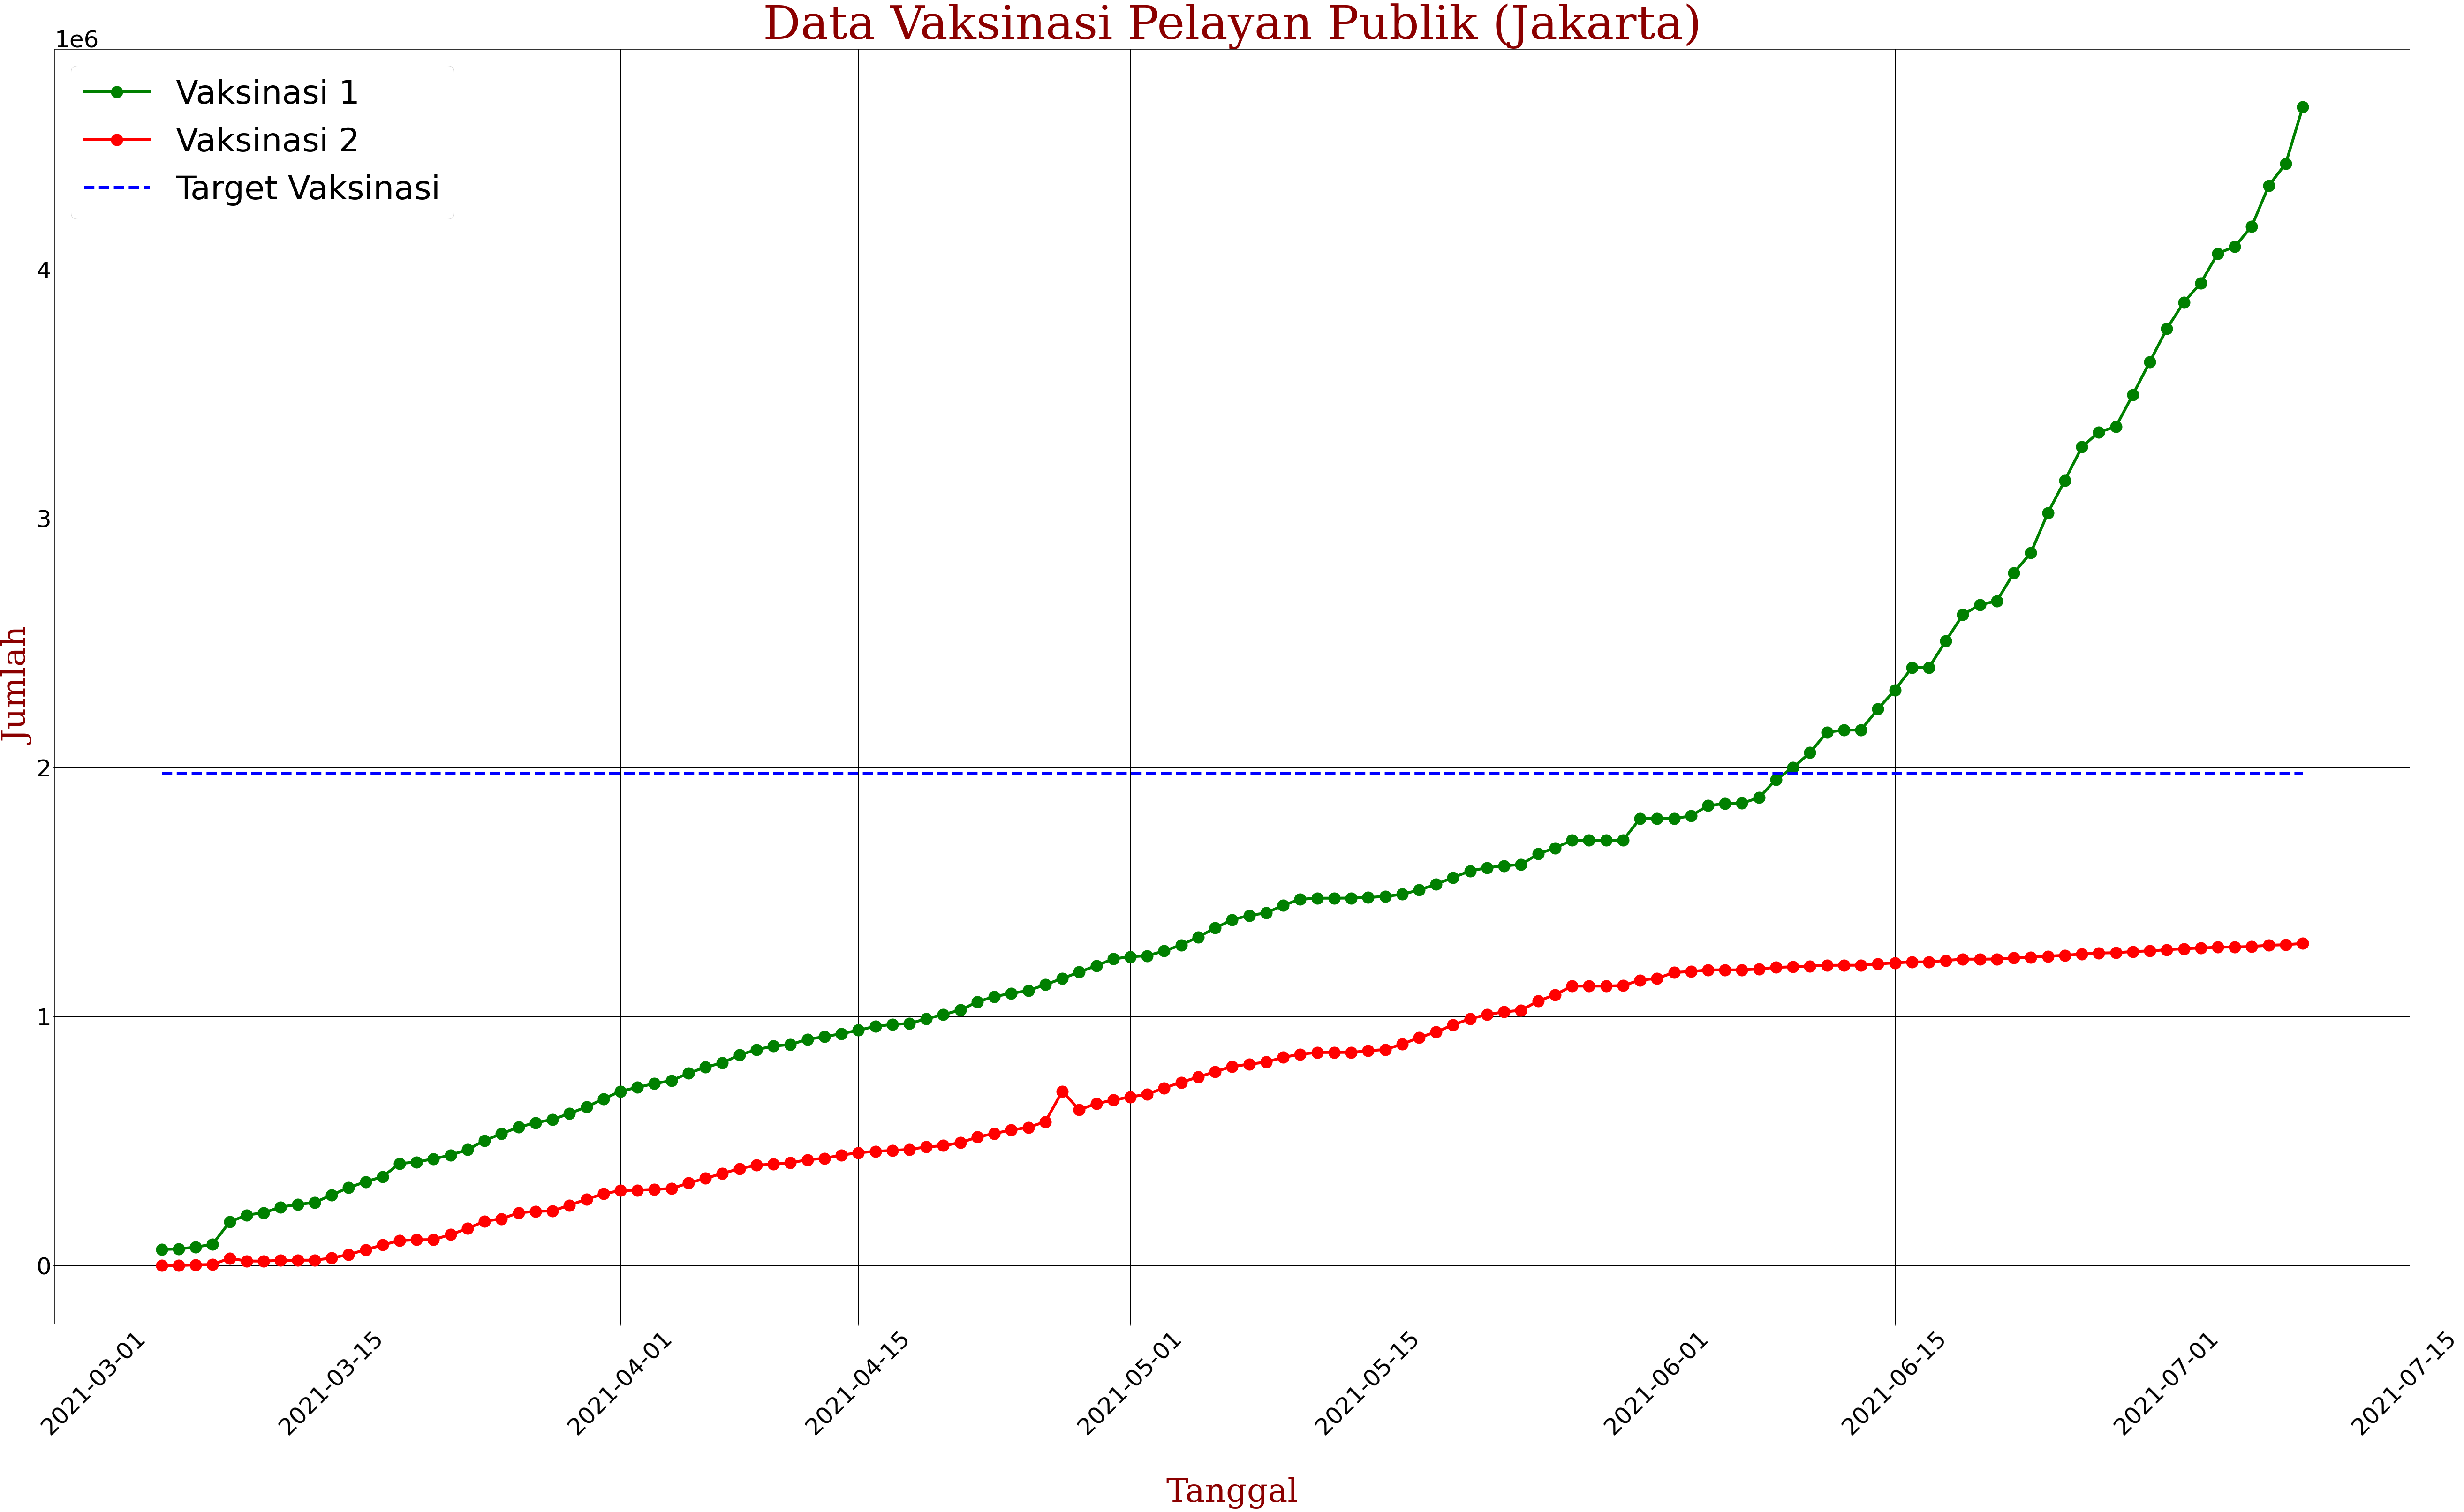

In [15]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

fig, ax = plt.subplots(figsize=(90,50))
ax.plot(df_ppjkt['Vaksinasi 1'],label = 'Vaksinasi 1',marker="o",markersize=25,color='g',linewidth=6)
ax.plot(df_ppjkt['Vaksinasi 2'],label = 'Vaksinasi 2',marker="o",markersize=25,color='r',linewidth=6)
ax.plot(df_ppjkt['Target Vaksinasi'],label = 'Target Vaksinasi',linestyle='--',color='b',linewidth=6)
plt.setp(ax.get_xticklabels(), rotation = 45,fontsize=50)
plt.setp(ax.get_yticklabels(),fontsize=50)
ax.yaxis.offsetText.set_fontsize(50)
ax.legend(prop={'size': 70})
plt.title('Data Vaksinasi Pelayan Publik (Jakarta)',fontsize=100,fontdict=font)
plt.xlabel('\nTanggal',size = 70,fontdict=font)
plt.ylabel('Jumlah',size = 70,fontdict=font)
ax.grid(linewidth=1,color='black',b=True)

In [16]:
df_total_jkt = df.iloc[4:,16:21]
df_total_jkt.columns = df.iloc[3,16:21]
df_total_jkt = df_total_jkt.set_index(df_tanggal)
df_total_jkt

3          Target Vaksinasi Vaksinasi 1 Vaksinasi 2 Persentase 1 Persentase 2
Tanggal                                                                      
2021-03-05          3000689      281997       91078     0.093977     0.030352
2021-03-06          3000689      289951       91379     0.096628     0.030453
2021-03-07          3000689      334506       93974     0.111476     0.031317
2021-03-08          3000689      361710       96978     0.120542     0.032319
2021-03-09          3000689      423139      119854     0.141014     0.039942
2021-03-10          3000689      473494      109554     0.157795      0.03651
2021-03-11          3000689      483492      109699     0.161127     0.036558
2021-03-12          3000689      519575      113038     0.173152     0.037671
2021-03-13          3000689      537965      114464      0.17928     0.038146
2021-03-14          3000689      550088      114621     0.183321     0.038198
2021-03-15          3000689      599696      124070     0.199853     0.041347
2021-03-16          3000689      647957      139204     0.215936     0.046391
2021-03-17          3000689      692365      159736     0.230735     0.053233
2021-03-18          3000689      734359      184432      0.24473     0.061463
2021-03-19          3000689      810602      199342     0.270139     0.066432
2021-03-20          3000689      824569      203266     0.274793      0.06774
2021-03-21          3000689      846439      204295     0.282082     0.068083
2021-03-22          3000689      879229      228255     0.293009     0.076068
2021-03-23          3000689      925387      258405     0.308392     0.086115
2021-03-24          3000689      997730      294083       0.3325     0.098005
2021-03-25          3000689     1046483      311135     0.348748     0.103688
2021-03-26          3000689     1092686      343272     0.364145     0.114398
2021-03-27          3000689     1121735      351121     0.373826     0.117013
2021-03-28          3000689     1140388      353105     0.380042     0.117675
2021-03-29          3000689     1178243      388065     0.392657     0.129325
2021-03-30          3000689     1220617      425325     0.406779     0.141742
2021-03-31          3000689     1267378      458982     0.422362     0.152959
2021-04-01          3000689     1301379      485734     0.433693     0.161874
2021-04-02          3000689     1325622      490215     0.441773     0.163367
2021-04-03          3000689     1339471      494227     0.446388     0.164705
2021-04-04          3000689     1352341      498076     0.450677     0.165987
2021-04-05          3000689     1387188      546103      0.46229     0.181993
2021-04-06          3000689     1415143      580965     0.471606     0.193611
2021-04-07          3000689     1436663      619311     0.478778      0.20639
2021-04-08          3000689     1475689      644297     0.491783     0.214716
2021-04-09          3000689     1506706      677132      0.50212     0.225659
2021-04-10          3000689     1528219      687612     0.509289     0.229151
2021-04-11          3000689     1537387      697480     0.512345      0.23244
2021-04-12          3000689     1569019      728994     0.522886     0.242942
2021-04-13          3000689     1584064      749172       0.5279     0.249667
2021-04-14          3000689     1598341      783181     0.532658        0.261
2021-04-15          3000689     1615457      813687     0.538362     0.271167
2021-04-16          3000689     1633447      840544     0.544357     0.280117
2021-04-17          3000689     1641932      849048     0.547185     0.282951
2021-04-18          3000689     1646295      857137     0.548639     0.285647
2021-04-19          3000689     1668563      894069      0.55606     0.297955
2021-04-20          3000689     1687399      911103     0.562337     0.303631
2021-04-21          3000689     1708066      943905     0.569225     0.314563
2021-04-22          3000689     1746457      995717     0.582019     0.331829
2021-04-23          30

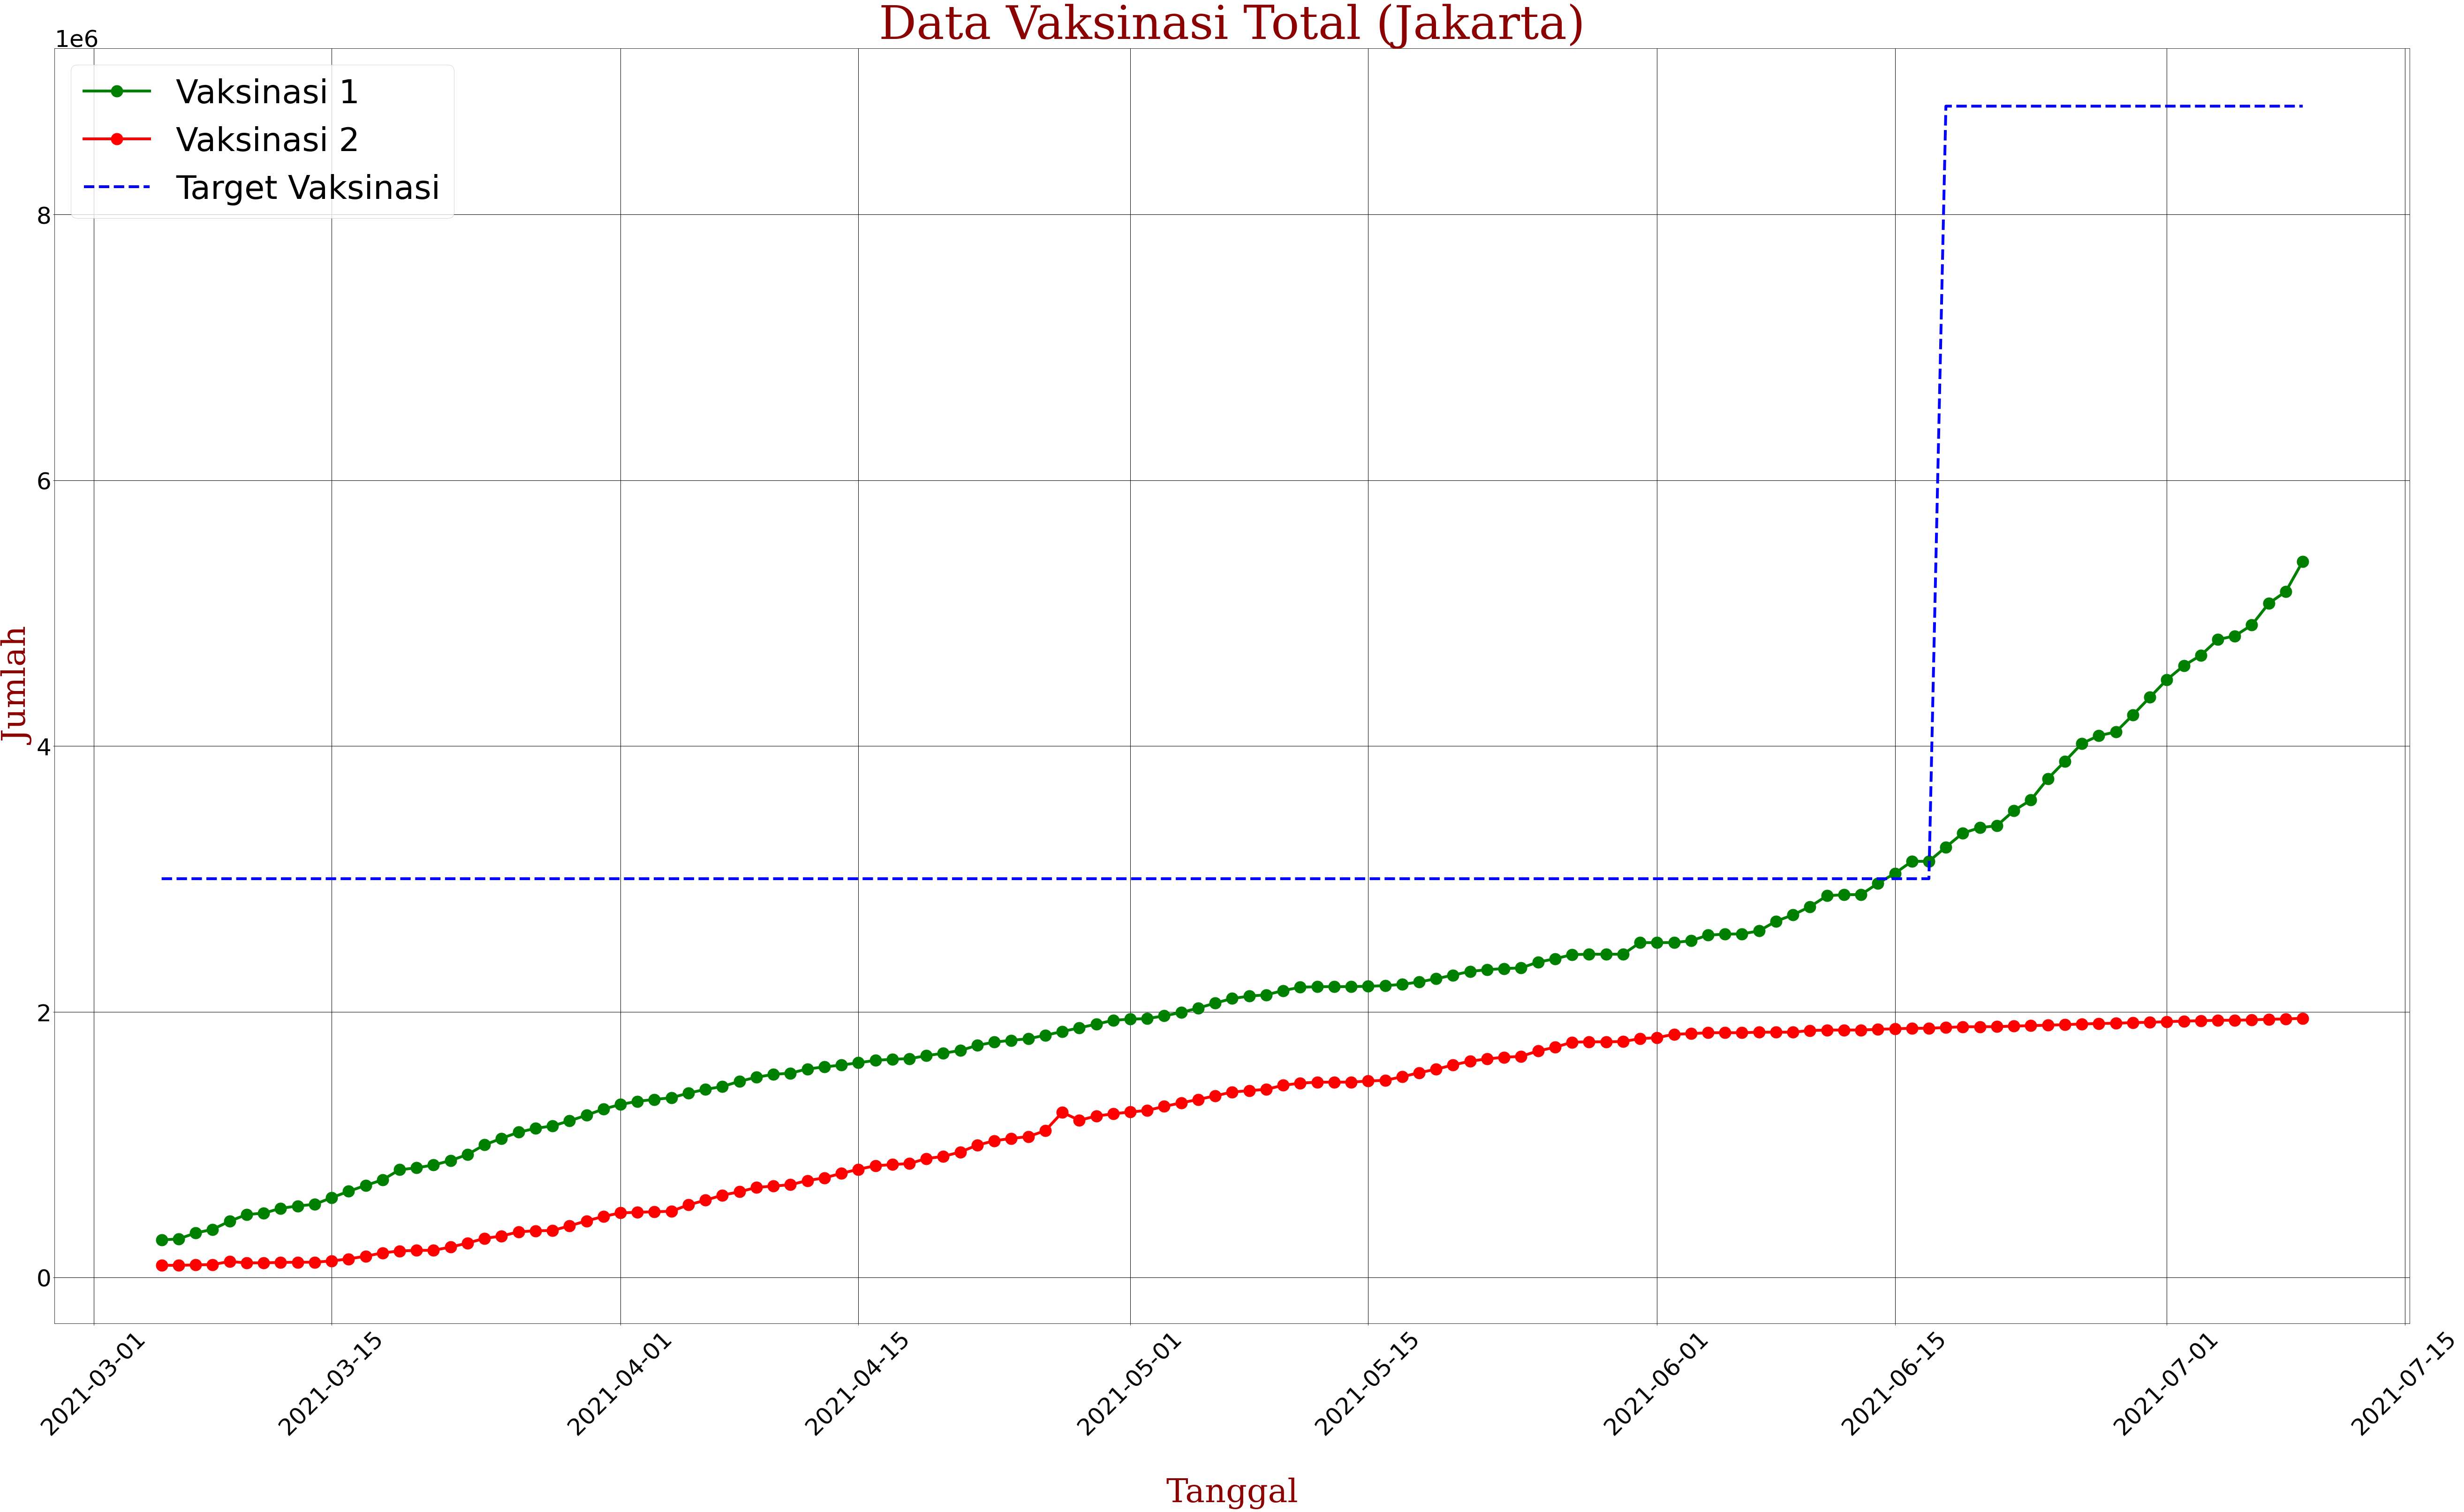

In [17]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

fig, ax = plt.subplots(figsize=(90,50))
ax.plot(df_total_jkt['Vaksinasi 1'],label = 'Vaksinasi 1',marker="o",markersize=25,color='g',linewidth=6)
ax.plot(df_total_jkt['Vaksinasi 2'],label = 'Vaksinasi 2',marker="o",markersize=25,color='r',linewidth=6)
ax.plot(df_total_jkt['Target Vaksinasi'],label = 'Target Vaksinasi',linestyle='--',color='b',linewidth=6)
plt.setp(ax.get_xticklabels(), rotation = 45,fontsize=50)
plt.setp(ax.get_yticklabels(),fontsize=50)
ax.yaxis.offsetText.set_fontsize(50)
ax.legend(prop={'size': 70})
plt.title('Data Vaksinasi Total (Jakarta)',fontsize=100,fontdict=font)
plt.xlabel('\nTanggal',size = 70,fontdict=font)
plt.ylabel('Jumlah',size = 70,fontdict=font)
ax.grid(linewidth=1,color='black',b=True)

In [18]:
df_1859thjkt = df.iloc[109:,23:28]
df_1859thjkt.columns = df.iloc[3,23:28]
df_1859thjkt = df_1859thjkt.set_index(df_tanggal.iloc[105:])
df_1859thjkt

3          Target Vaksinasi Vaksinasi 1 Vaksinasi 2 Persentase 1 Persentase 2
Tanggal                                                                      
2021-06-18          7903526     2644205     1345724      0.33456     0.170269
2021-06-19          7903526     2749208     1351050     0.347846     0.170943
2021-06-20          7903526     2789050     1351484     0.352887     0.170998
2021-06-21          7903526     2804191     1351982     0.354803     0.171061
2021-06-22          7903526     2917358     1356385     0.369121     0.171618
2021-06-23          7903526     2997505     1359535     0.379262     0.172016
2021-06-24          7903526     3157797     1363294     0.399543     0.172492
2021-06-25          7903526     3288442     1367060     0.416073     0.172968
2021-06-26          7903526     3422602     1372008     0.433047     0.173594
2021-06-27          7903526     3482082     1375957     0.440573     0.174094
2021-06-28          7903526     3505132     1377641      0.44349     0.174307
2021-06-29          7903526     3633085     1382389     0.459679     0.174908
2021-06-30          7903526     3765772     1384972     0.476467     0.175235
2021-07-01          7903526     3897692     1389577     0.493159     0.175817
2021-07-02          7903526     4003127     1393841     0.506499     0.176357
2021-07-03          7903526     4080842     1396532     0.516332     0.176697
2021-07-04          7903526     4199487     1399996     0.531343     0.177136
2021-07-05          7903526     4215155     1400584     0.533326      0.17721
2021-07-06          7903526     4290114     1402830      0.54281     0.177494
2021-07-07          7903526     4436232     1407819     0.561298     0.178125
2021-07-08          7903526     4516412     1409848     0.571443     0.178382
2021-07-09          7903526     4705939     1415222     0.595423     0.179062

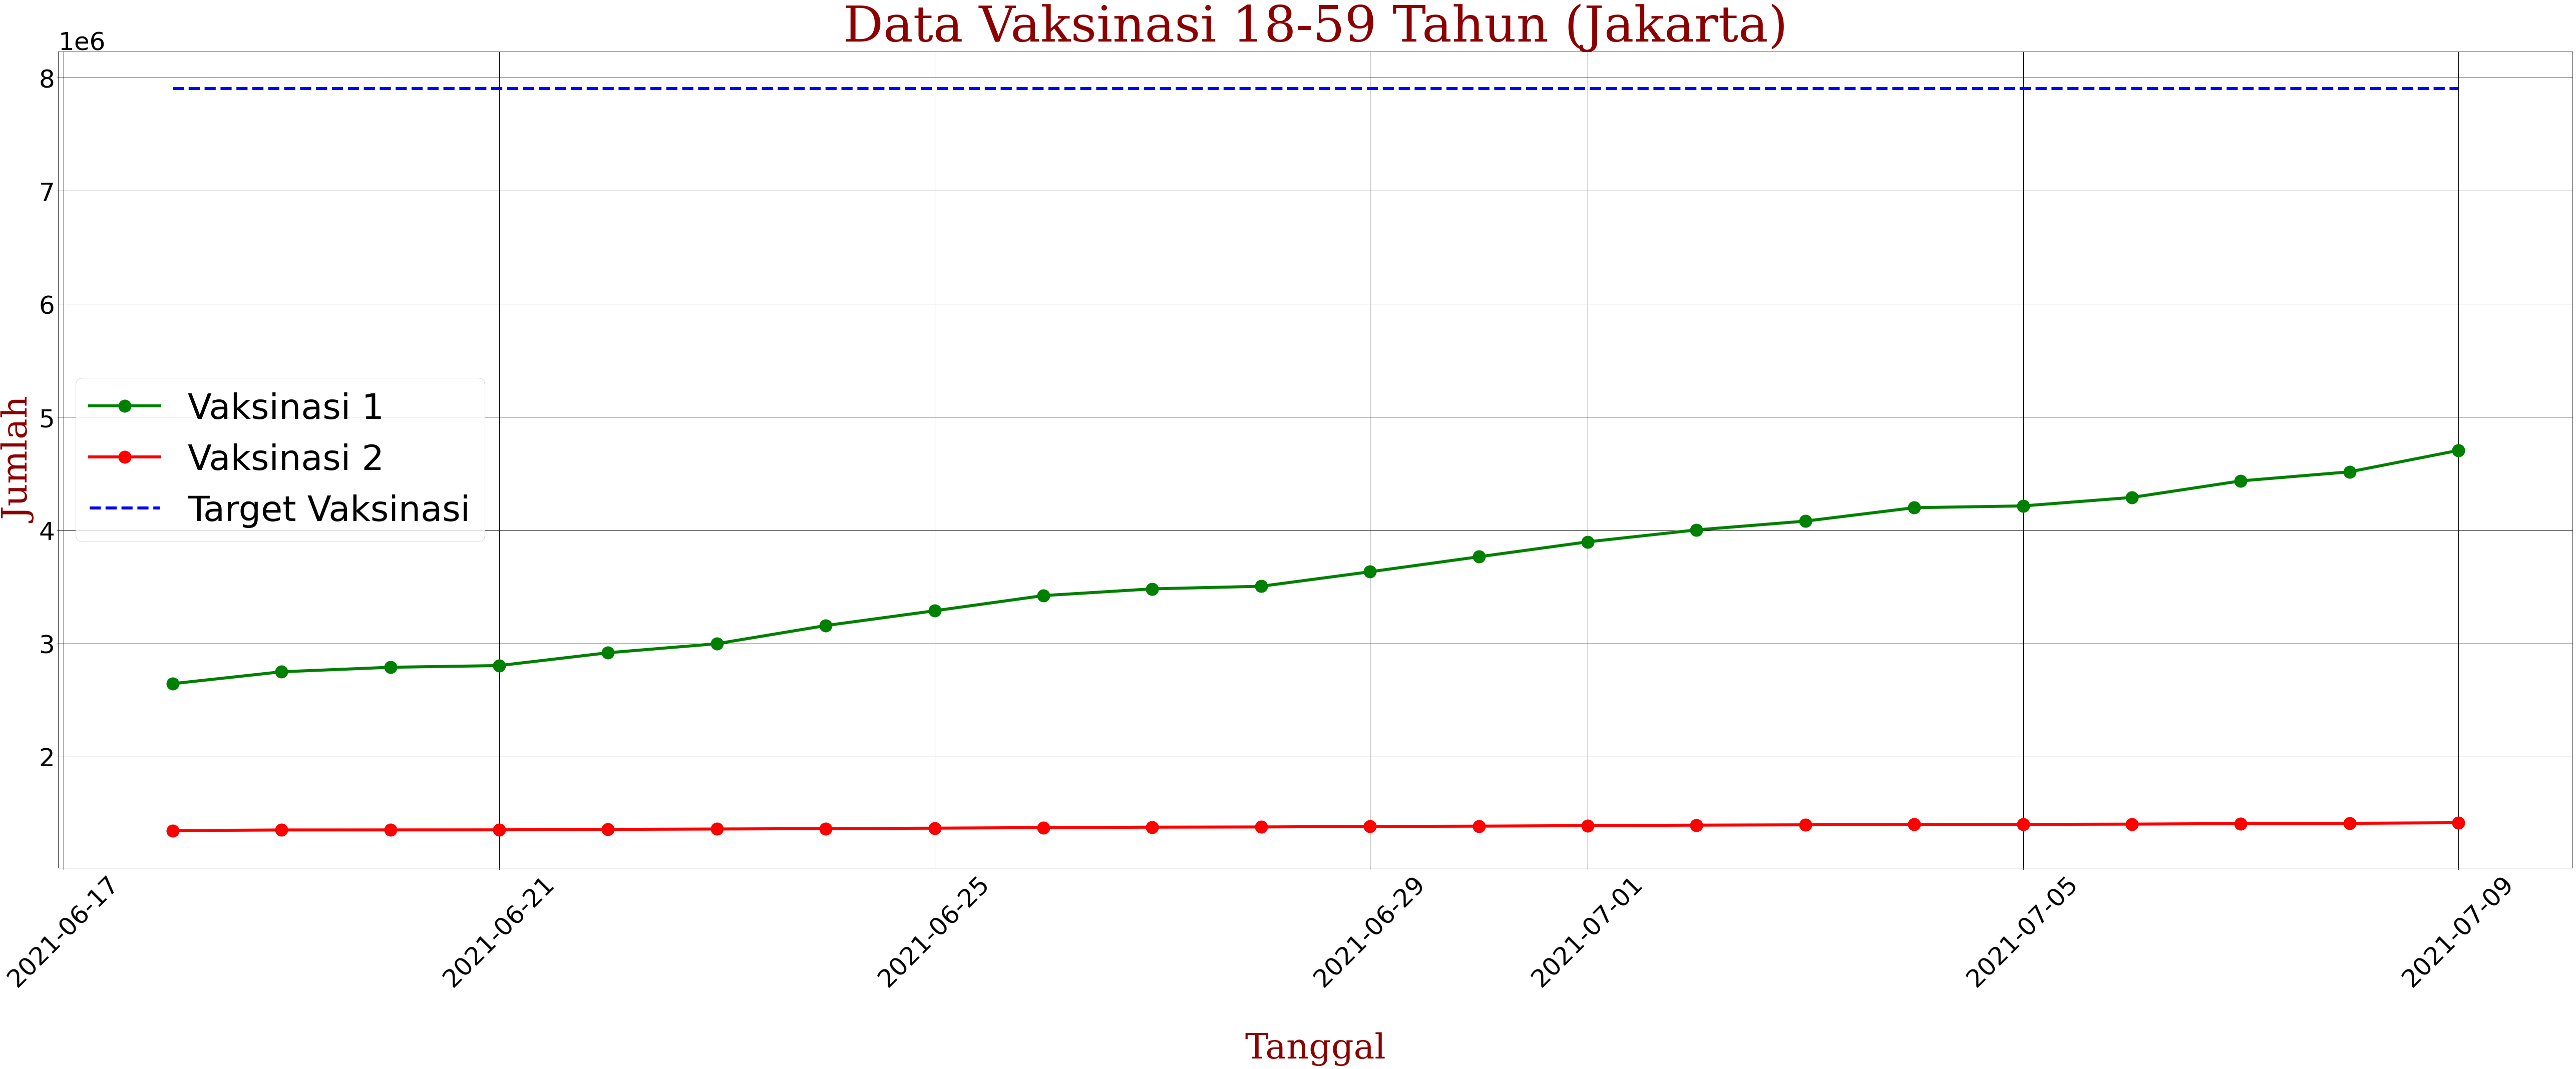

In [19]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

fig, ax = plt.subplots(figsize=(90,30))
ax.plot(df_1859thjkt['Vaksinasi 1'],label = 'Vaksinasi 1',marker="o",markersize=25,color='g',linewidth=6)
ax.plot(df_1859thjkt['Vaksinasi 2'],label = 'Vaksinasi 2',marker="o",markersize=25,color='r',linewidth=6)
ax.plot(df_1859thjkt['Target Vaksinasi'],label = 'Target Vaksinasi',linestyle='--',color='b',linewidth=6)
plt.setp(ax.get_xticklabels(), rotation = 45,fontsize=50)
plt.setp(ax.get_yticklabels(),fontsize=50)
ax.yaxis.offsetText.set_fontsize(50)
ax.legend(prop={'size': 70})
plt.title('Data Vaksinasi 18-59 Tahun (Jakarta)',fontsize=100,fontdict=font)
plt.xlabel('\nTanggal',size = 70,fontdict=font)
plt.ylabel('Jumlah',size = 70,fontdict=font)
ax.grid(linewidth=1,color='black',b=True)

In [20]:
df_1217thjkt = df.iloc[122:,28:33]
df_1217thjkt.columns = df.iloc[3,28:33]
df_1217thjkt = df_1217thjkt.set_index(df_tanggal.iloc[118:])
df_1217thjkt

3          Target Vaksinasi Vaksinasi 1 Vaksinasi 2 Persentase 1 Persentase 2
Tanggal                                                                      
2021-07-01           984719         682           0     0.000693            0
2021-07-02           984719        1293           0     0.001313            0
2021-07-03           984719        1293           0     0.001313            0
2021-07-04           984719        1293           0     0.001313            0
2021-07-05           984719       12962           0     0.013163            0
2021-07-06           984719       19685           0      0.01999            0
2021-07-07           984719       36724           0     0.037294            0
2021-07-08           984719       45406           0     0.046111            0
2021-07-09           984719       82784           0     0.084069            0

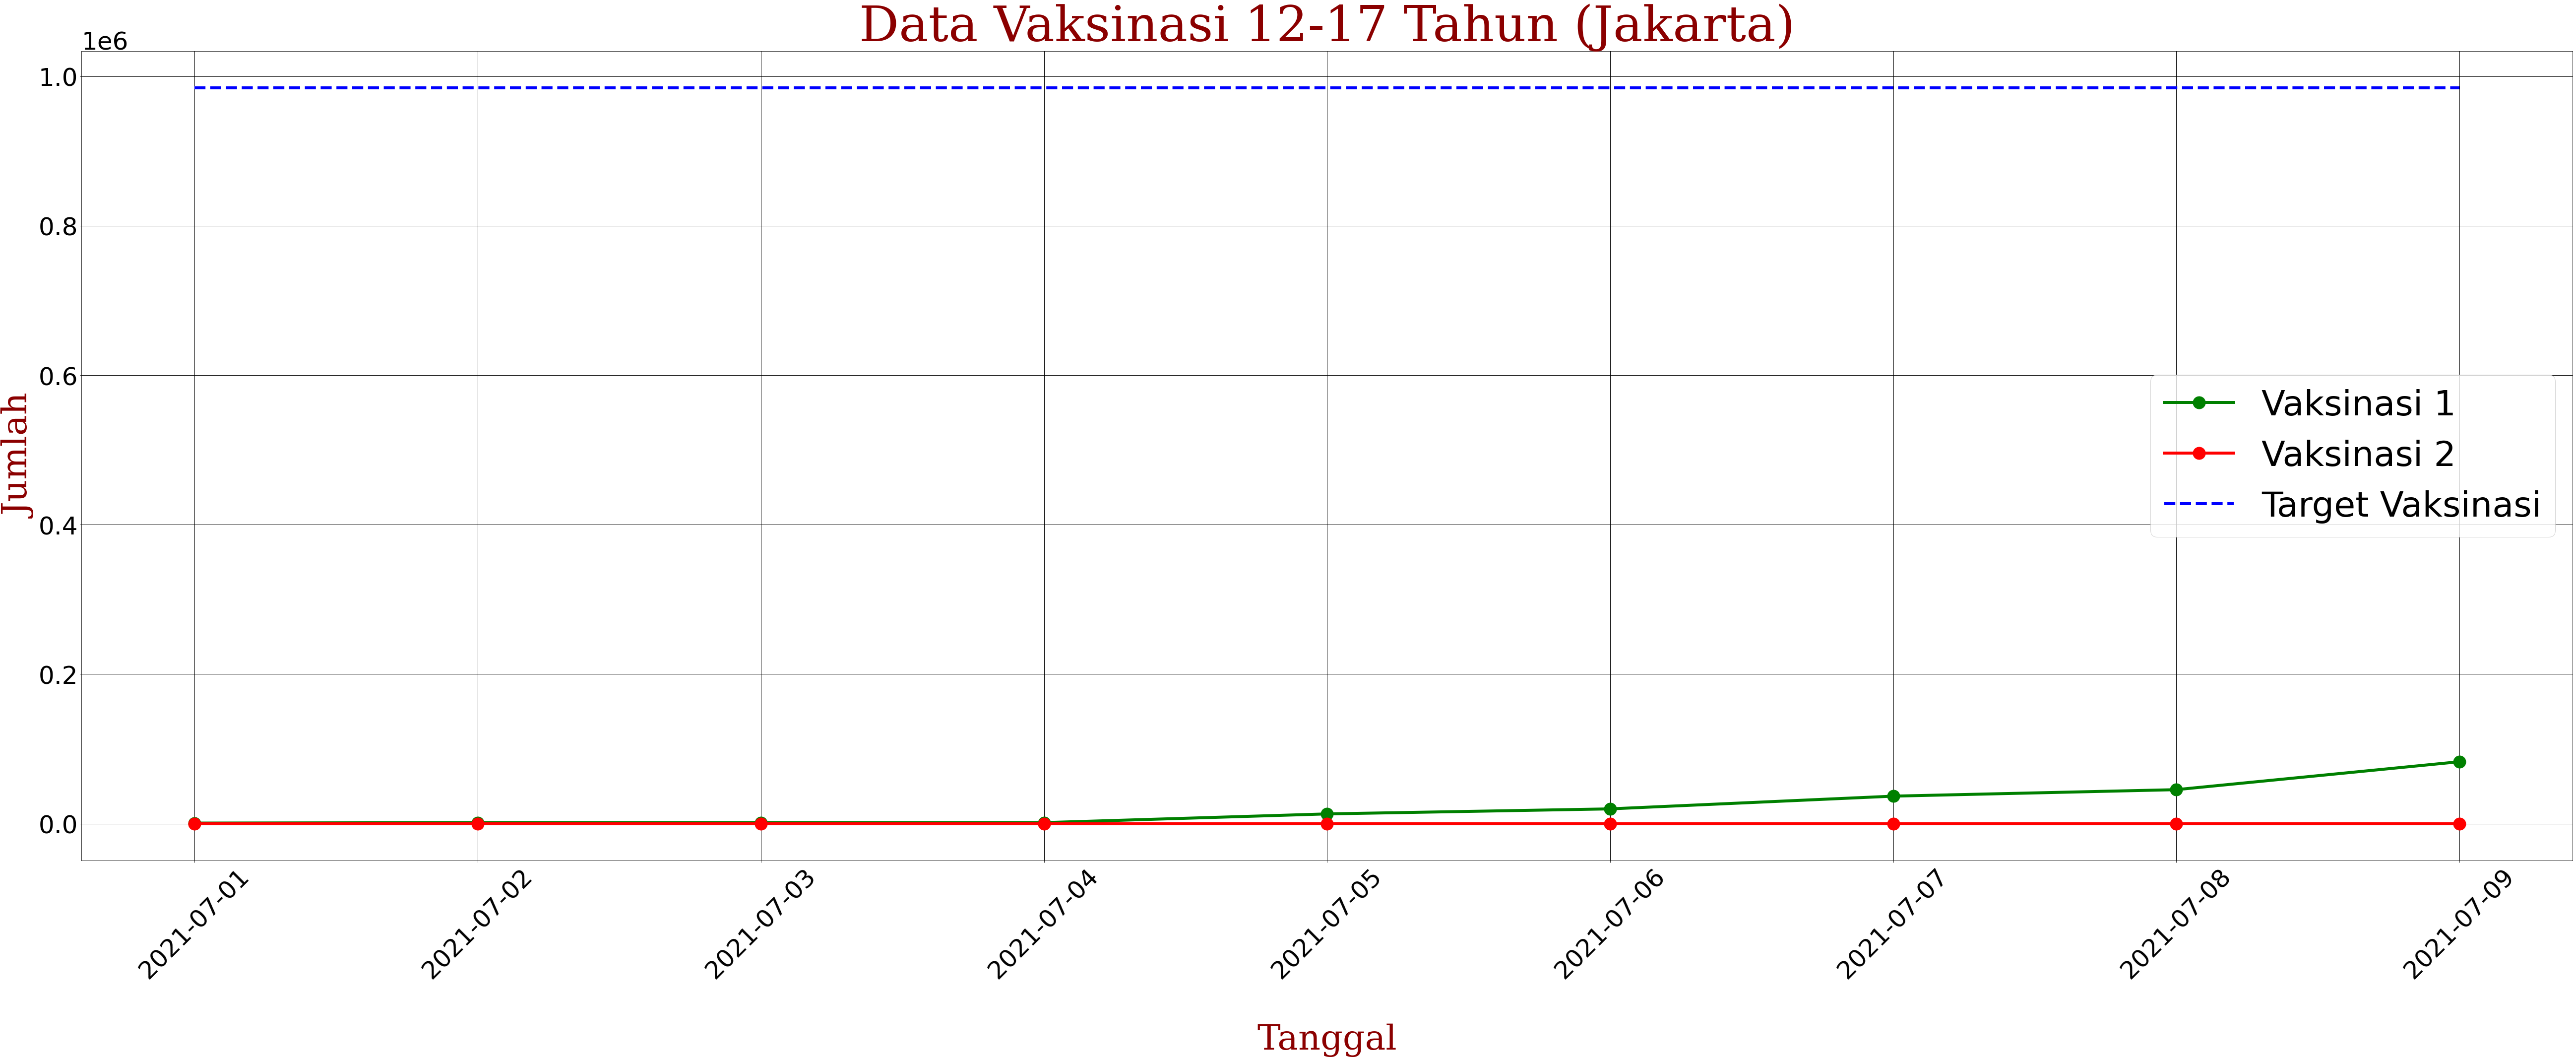

In [21]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

fig, ax = plt.subplots(figsize=(90,30))
ax.plot(df_1217thjkt['Vaksinasi 1'],label = 'Vaksinasi 1',marker="o",markersize=25,color='g',linewidth=6)
ax.plot(df_1217thjkt['Vaksinasi 2'],label = 'Vaksinasi 2',marker="o",markersize=25,color='r',linewidth=6)
ax.plot(df_1217thjkt['Target Vaksinasi'],label = 'Target Vaksinasi',linestyle='--',color='b',linewidth=6)
plt.setp(ax.get_xticklabels(), rotation = 45,fontsize=50)
plt.setp(ax.get_yticklabels(),fontsize=50)
ax.yaxis.offsetText.set_fontsize(50)
ax.legend(prop={'size': 70})
plt.title('Data Vaksinasi 12-17 Tahun (Jakarta)',fontsize=100,fontdict=font)
plt.xlabel('\nTanggal',size = 70,fontdict=font)
plt.ylabel('Jumlah',size = 70,fontdict=font)
ax.grid(linewidth=1,color='black',b=True)

In [22]:
df_nakes = df.iloc[4:,33:38]
df_nakes.columns = df.iloc[3,33:38]
df_nakes = df_nakes.set_index(df_tanggal)
df_nakes

3          Target Vaksinasi Vaksinasi 1 Vaksinasi 2 Persentase 1 Persentase 2
Tanggal                                                                      
2021-03-05          1468764     1692016     1111938        1.152     0.757057
2021-03-06          1468764     1741784     1126353     1.185884     0.766871
2021-03-07          1468764     2049651     1129340     1.395494     0.768905
2021-03-08          1468764     2114655     1149547     1.439751     0.782663
2021-03-09          1468764     1395498     1127633     0.950117     0.767743
2021-03-10          1468764     1395498     1127633     0.950117     0.767743
2021-03-11          1468764     1402959     1147846     0.955197     0.781505
2021-03-12          1468764     1402959     1147846     0.955197     0.781505
2021-03-13          1468764     1412736     1171385     0.961854     0.797531
2021-03-14          1468764     1413684     1172848     0.962499     0.798527
2021-03-15          1468764     1418620     1183715      0.96586     0.805926
2021-03-16          1468764     1425885     1196387     0.970806     0.814554
2021-03-17          1468764     1431713     1208113     0.974774     0.822537
2021-03-18          1468764     1437642     1221179     0.978811     0.831433
2021-03-19          1468764     1442440     1231104     0.982077      0.83819
2021-03-20          1468764     1442440     1231104     0.982077      0.83819
2021-03-21          1468764     1446141     1236791     0.984597     0.842062
2021-03-22          1468764     1449757     1245055     0.987059     0.847689
2021-03-23          1468764     1453841     1254761      0.98984     0.854297
2021-03-24          1468764     1458033     1263152     0.992694      0.86001
2021-03-25          1468764     1461489     1266029     0.995047     0.861969
2021-03-26          1468764     1464650     1270999     0.997199     0.865353
2021-03-27          1468764     1429532     1272381     0.973289     0.866294
2021-03-28          1468764     1430428     1273417     0.973899     0.866999
2021-03-29          1468764     1432153     1275981     0.975074     0.868745
2021-03-30          1468764     1435351     1282214     0.977251     0.872988
2021-03-31          1468764     1438016     1286168     0.979065     0.875681
2021-04-01          1468764     1440648     1289711     0.980857     0.878093
2021-04-02          1468764     1441069     1290437     0.981144     0.878587
2021-04-03          1468764     1441529     1292170     0.981457     0.879767
2021-04-04          1468764     1441914     1293500     0.981719     0.880672
2021-04-05          1468764     1443385     1297351     0.982721     0.883294
2021-04-06          1468764     1444800     1300745     0.983684     0.885605
2021-04-07          1468764     1445970     1302596     0.984481     0.886865
2021-04-08          1468764     1447505     1304661     0.985526     0.888271
2021-04-09          1468764     1451679     1309418     0.988368      0.89151
2021-04-10          1468764     1453325     1310929     0.989488     0.892539
2021-04-11          1468764     1453701     1311259     0.989744     0.892764
2021-04-12          1468764     1455949     1314396     0.991275     0.894899
2021-04-13          1468764     1457405     1316347     0.992266     0.896228
2021-04-14          1468764     1459169     1318528     0.993467     0.897713
2021-04-15          1468764     1460747     1321085     0.994542     0.899454
2021-04-16          1468764     1464225     1323006      0.99691     0.900761
2021-04-17          1468764     1465021     1323987     0.997452     0.901429
2021-04-18          1468764     1465210     1324382      0.99758     0.901698
2021-04-19          1468764     1466675     1325963     0.998578     0.902775
2021-04-20          1468764     1467860     1327443     0.999385     0.903782
2021-04-21          1468764     1480525     1338926     1.008007     0.911601
2021-04-22          1468764     1481515     1340196     1.008681     0.912465
2021-04-23          14

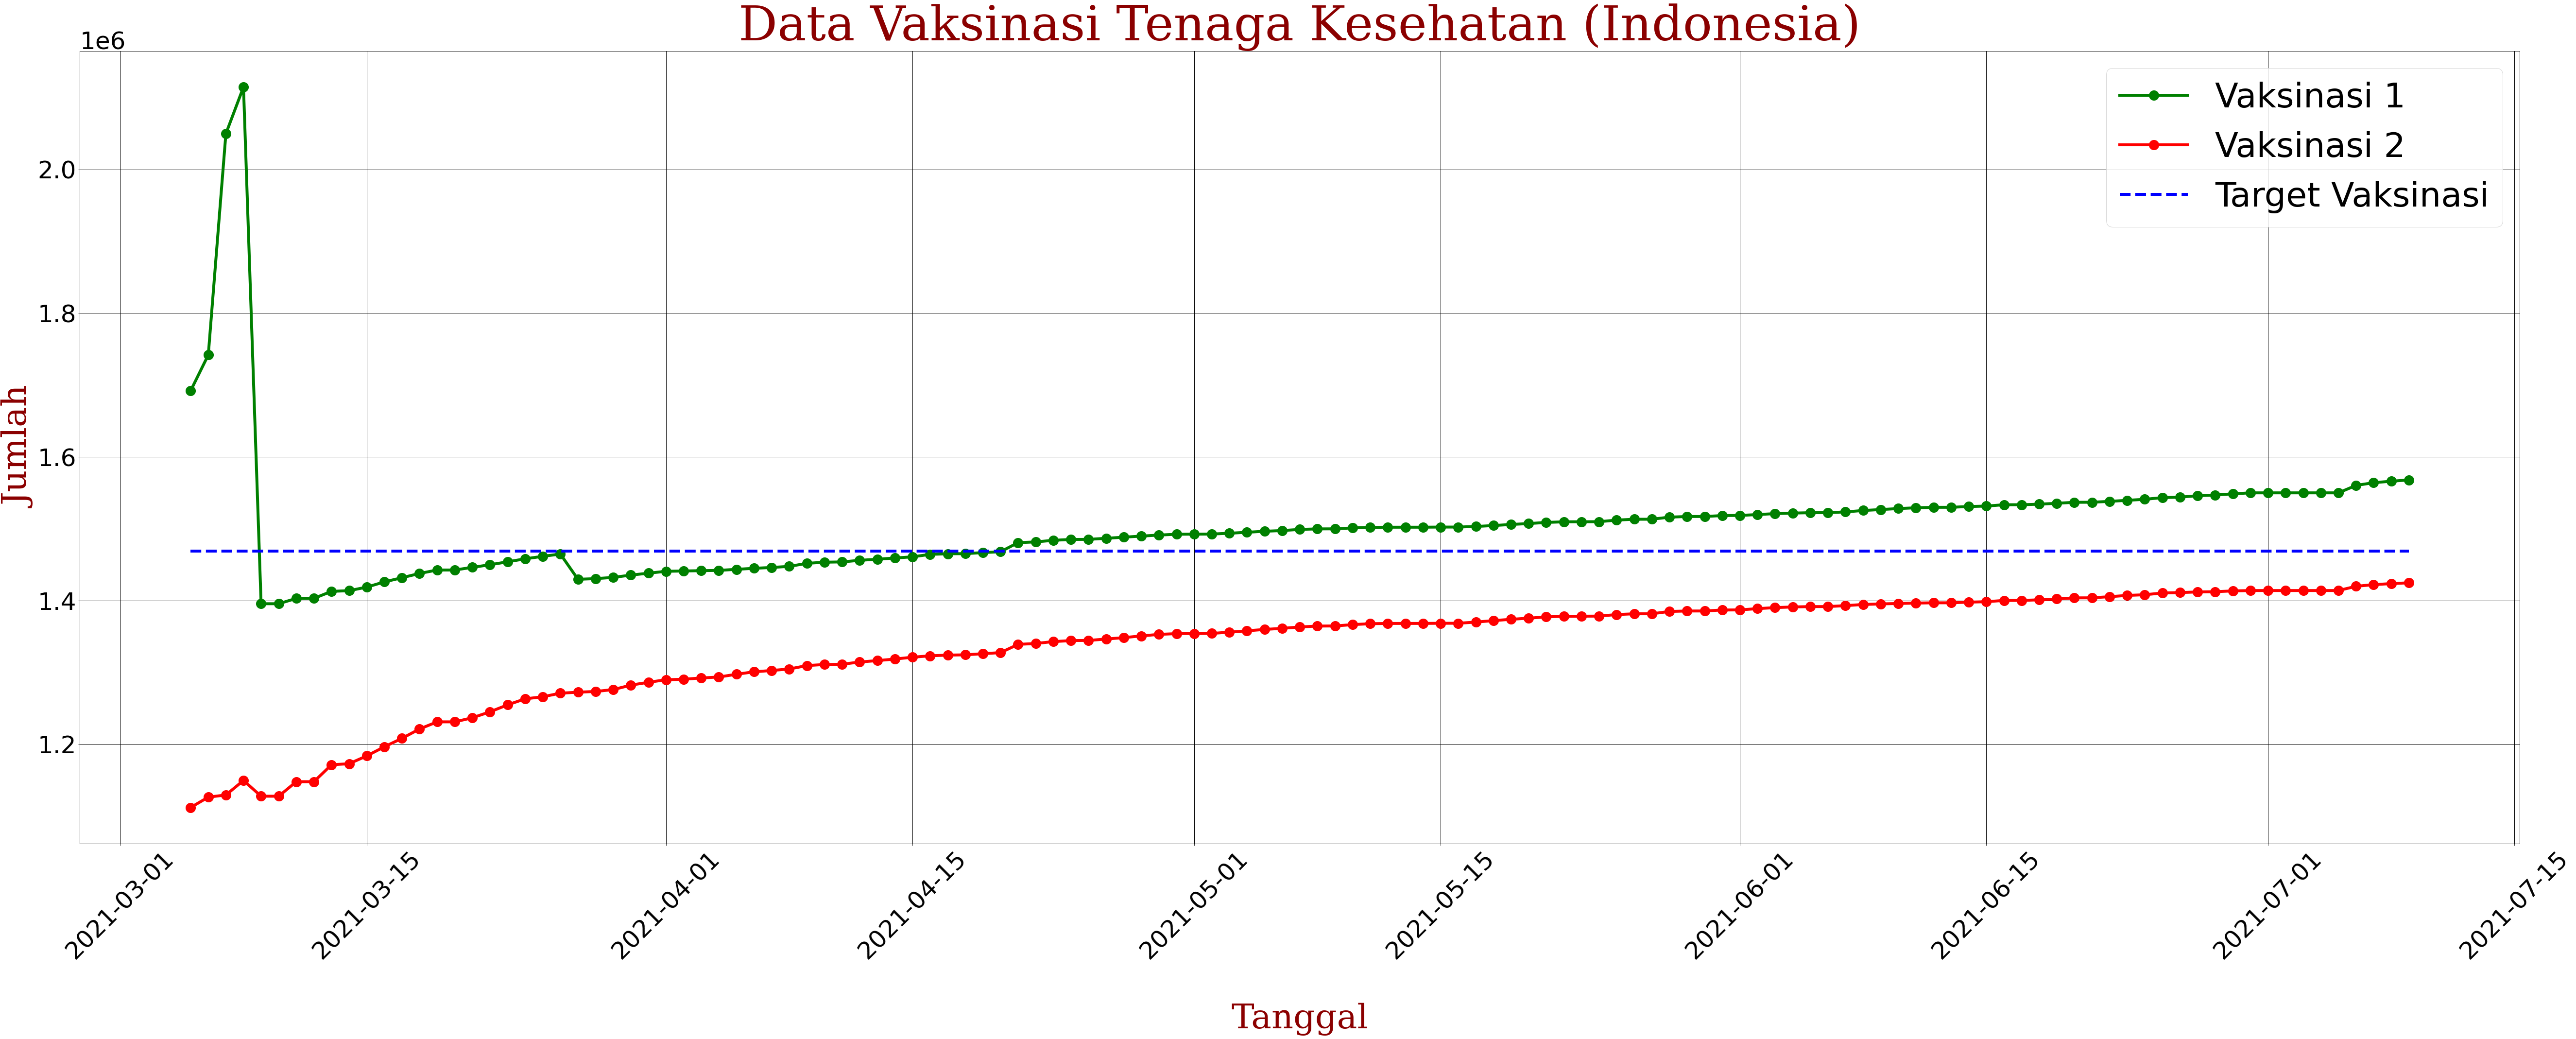

In [23]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

fig, ax = plt.subplots(figsize=(90,30))
ax.plot(df_nakes['Vaksinasi 1'],label = 'Vaksinasi 1',marker="o",markersize=20,color='g',linewidth=6)
ax.plot(df_nakes['Vaksinasi 2'],label = 'Vaksinasi 2',marker="o",markersize=20,color='r',linewidth=6)
ax.plot(df_nakes['Target Vaksinasi'],label = 'Target Vaksinasi',linestyle='--',color='b',linewidth=6)
plt.setp(ax.get_xticklabels(), rotation = 45,fontsize=50)
plt.setp(ax.get_yticklabels(),fontsize=50)
ax.yaxis.offsetText.set_fontsize(50)
ax.legend(prop={'size': 70})
plt.title('Data Vaksinasi Tenaga Kesehatan (Indonesia)',fontsize=100,fontdict=font)
plt.xlabel('\nTanggal',size = 70,fontdict=font)
plt.ylabel('Jumlah',size = 70,fontdict=font)
ax.grid(linewidth=1,color='black',b=True)

In [24]:
df_lansia = df.iloc[4:,38:43]
df_lansia.columns = df.iloc[3,38:43]
df_lansia = df_lansia.set_index(df_tanggal)
df_lansia

3          Target Vaksinasi Vaksinasi 1 Vaksinasi 2 Persentase 1 Persentase 2
Tanggal                                                                      
2021-03-05         21553118      179711           2     0.008338          0.0
2021-03-06         21553118      206025           2     0.009559          0.0
2021-03-07         21553118      215632           2     0.010005          0.0
2021-03-08         21553118      267603           5     0.012416          0.0
2021-03-09         21553118      430591        1612     0.019978     0.000075
2021-03-10         21553118      494125        2694     0.022926     0.000125
2021-03-11         21553118      525891        3080       0.0244     0.000143
2021-03-12         21553118      525891        3080       0.0244     0.000143
2021-03-13         21553118      625665        4497     0.029029     0.000209
2021-03-14         21553118      638492        4530     0.029624      0.00021
2021-03-15         21553118      701583        5151     0.032551     0.000239
2021-03-16         21553118      770545        5844     0.035751     0.000271
2021-03-17         21553118      836628        6600     0.038817     0.000306
2021-03-18         21553118      905102        7106     0.041994      0.00033
2021-03-19         21553118      954828        7590     0.044301     0.000352
2021-03-20         21553118      954828        7590     0.044301     0.000352
2021-03-21         21553118     1011483        8534      0.04693     0.000396
2021-03-22         21553118     1011483        8534      0.04693     0.000396
2021-03-23         21553118     1125037       22286     0.052198     0.001034
2021-03-24         21553118     1225564       38904     0.056862     0.001805
2021-03-25         21553118     1301782       57227     0.060399     0.002655
2021-03-26         21553118     1356432       78322     0.062934     0.003634
2021-03-27         21553118     1394731       93529     0.064711     0.004339
2021-03-28         21553118     1414656      101709     0.065636     0.004719
2021-03-29         21553118     1453977      118546      0.06746       0.0055
2021-03-30         21553118     1546269      159823     0.071742     0.007415
2021-03-31         21553118     1616340      183141     0.074993     0.008497
2021-04-01         21553118     1672730      213333      0.07761     0.009898
2021-04-02         21553118     1679615      217777     0.077929     0.010104
2021-04-03         21553118     1706928      254973     0.079196      0.01183
2021-04-04         21553118     1721077      261638     0.079853     0.012139
2021-04-05         21553118     1771003      329227     0.082169     0.015275
2021-04-06         21553118     1813087      400533     0.084122     0.018584
2021-04-07         21553118     1844923      439807     0.085599     0.020406
2021-04-08         21553118     1886623      461735     0.087534     0.021423
2021-04-09         21553118     1970580      541811     0.091429     0.025138
2021-04-10         21553118     2019832      588340     0.093714     0.027297
2021-04-11         21553118     2030311      597464       0.0942     0.027721
2021-04-12         21553118     2088158      672035     0.096884      0.03118
2021-04-13         21553118     2108512      722410     0.097829     0.033518
2021-04-14         21553118     2131067      781975     0.098875     0.036281
2021-04-15         21553118     2155898      844895     0.100027     0.039201
2021-04-16         21553118     2178289      898025     0.101066     0.041666
2021-04-17         21553118     2199326      930003     0.102042     0.043149
2021-04-18         21553118     2203494      936963     0.102236     0.043472
2021-04-19         21553118     2237282     1002268     0.103803     0.046502
2021-04-20         21553118     2264590     1040757      0.10507     0.048288
2021-04-21         21553118     2298131     1111339     0.106626     0.051563
2021-04-22         21553118     2328940     1170028     0.108056     0.054286
2021-04-23         215

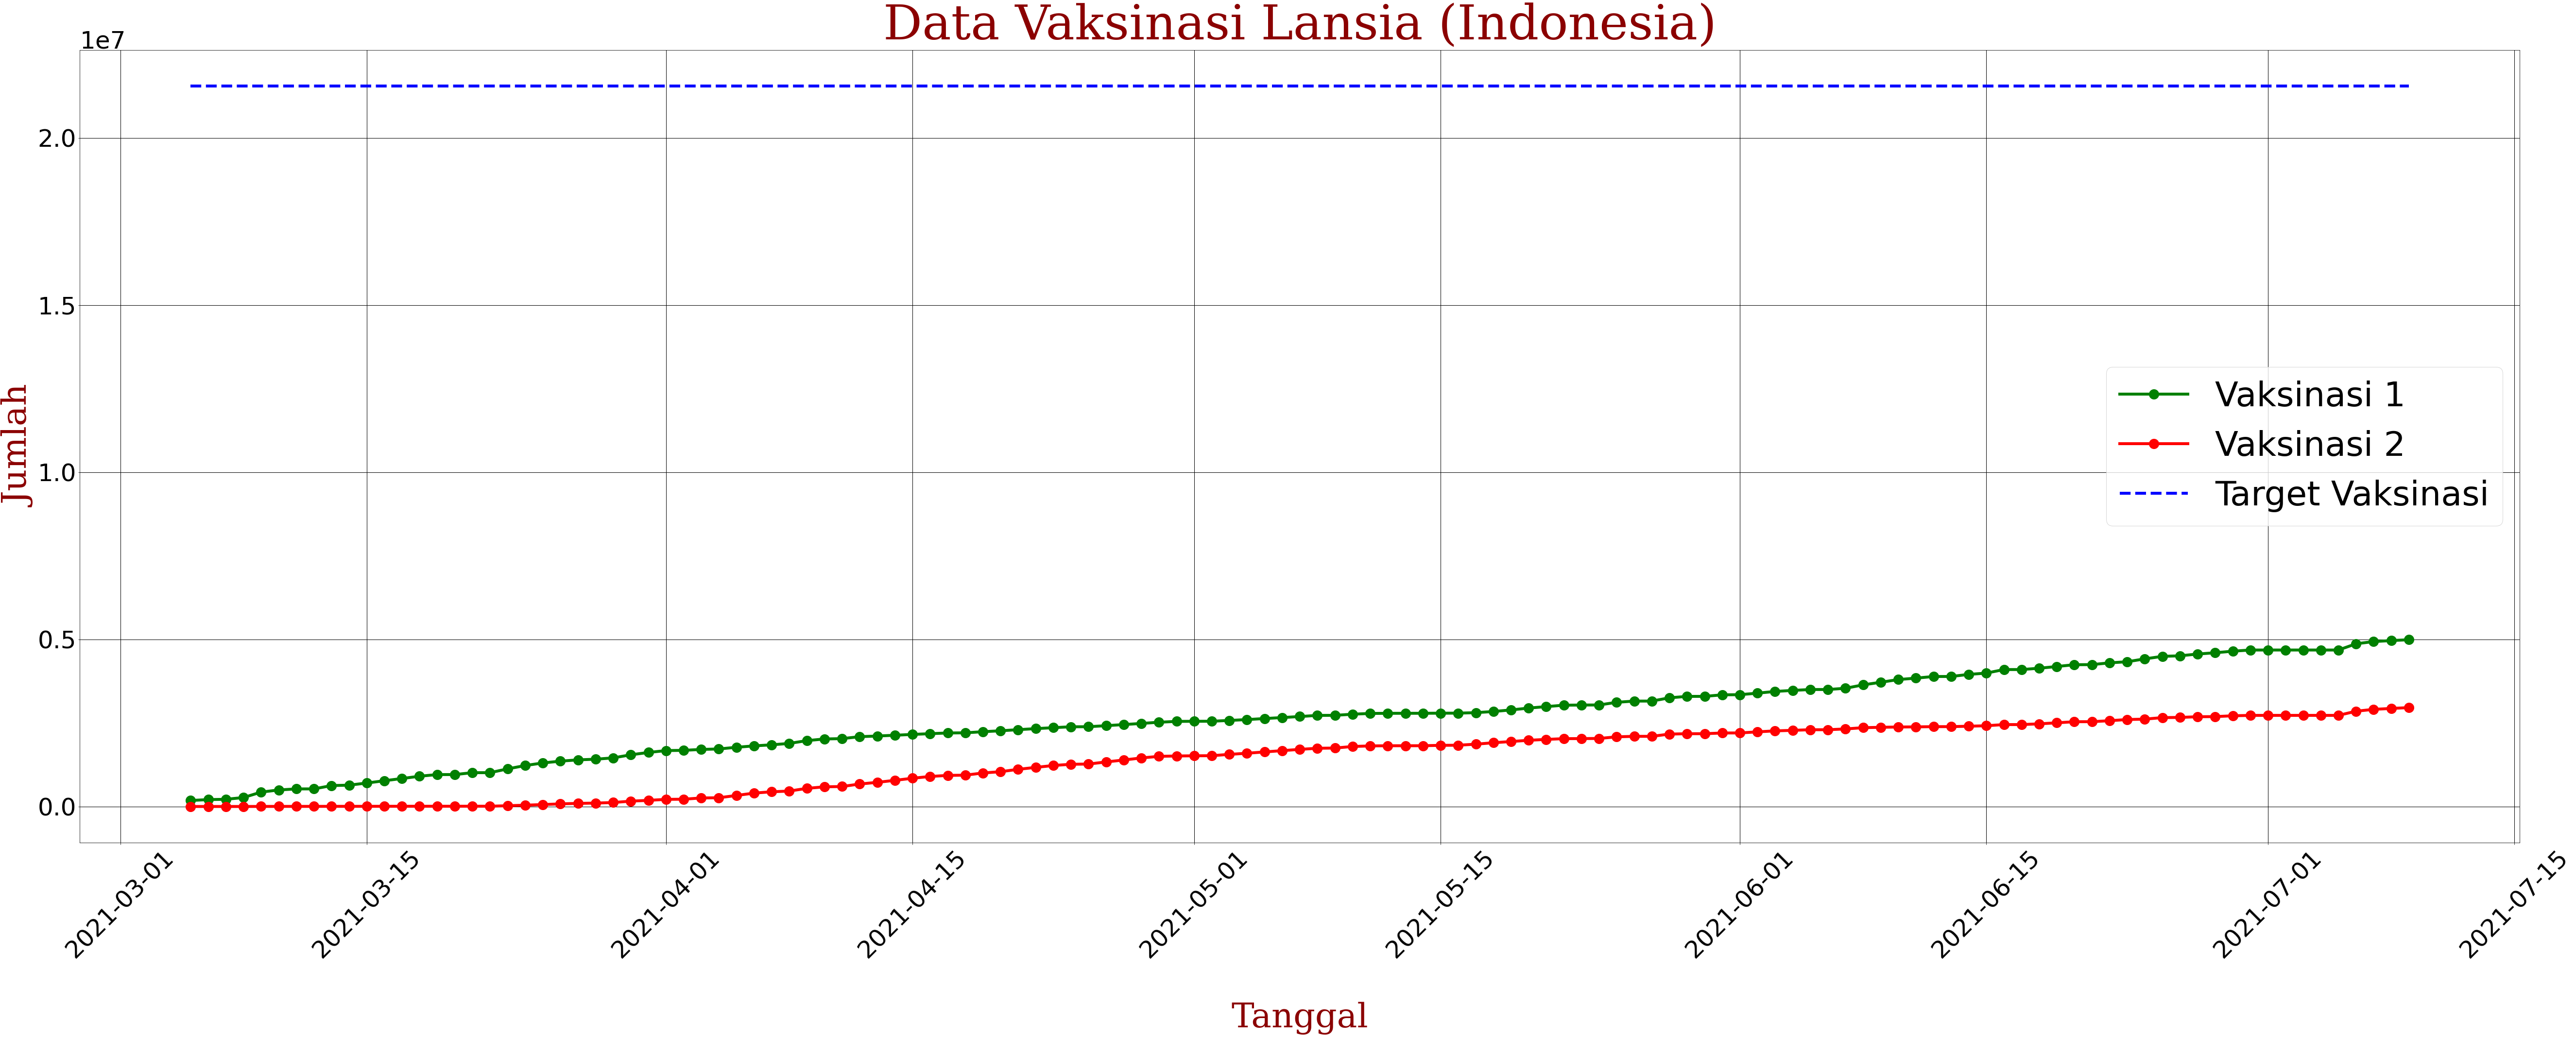

In [25]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

fig, ax = plt.subplots(figsize=(90,30))
ax.plot(df_lansia['Vaksinasi 1'],label = 'Vaksinasi 1',marker="o",markersize=20,color='g',linewidth=6)
ax.plot(df_lansia['Vaksinasi 2'],label = 'Vaksinasi 2',marker="o",markersize=20,color='r',linewidth=6)
ax.plot(df_lansia['Target Vaksinasi'],label = 'Target Vaksinasi',linestyle='--',color='b',linewidth=6)
plt.setp(ax.get_xticklabels(), rotation = 45,fontsize=50)
plt.setp(ax.get_yticklabels(),fontsize=50)
ax.yaxis.offsetText.set_fontsize(50)
ax.legend(prop={'size': 70})
plt.title('Data Vaksinasi Lansia (Indonesia)',fontsize=100,fontdict=font)
plt.xlabel('\nTanggal',size = 70,fontdict=font)
plt.ylabel('Jumlah',size = 70,fontdict=font)
ax.grid(linewidth=1,color='black',b=True)

In [26]:
df_pp = df.iloc[4:,43:48]
df_pp.columns = df.iloc[3,43:48]
df_pp = df_pp.set_index(df_tanggal)
df_pp

3          Target Vaksinasi Vaksinasi 1 Vaksinasi 2 Persentase 1 Persentase 2
Tanggal                                                                      
2021-03-05         17327169      541888        2597     0.031274      0.00015
2021-03-06         17327169      604456        4169     0.034885     0.000241
2021-03-07         17327169      623474        4445     0.035982     0.000257
2021-03-08         17327169      715767        8880     0.041309     0.000512
2021-03-09         17327169     1510937       68527       0.0872     0.003955
2021-03-10         17327169     1682896      119495     0.097125     0.006896
2021-03-11         17327169     1767209      144689     0.101991      0.00835
2021-03-12         17327169     1767209      144689     0.101991      0.00835
2021-03-13         17327169     1947195      278954     0.112378     0.016099
2021-03-14         17327169     1967948      282844     0.113576     0.016324
2021-03-15         17327169     2046659      383920     0.118118     0.022157
2021-03-16         17327169     2272399      514516     0.131147     0.029694
2021-03-17         17327169     2436907      661427     0.140641     0.038173
2021-03-18         17327169     2616319      840115     0.150995     0.048485
2021-03-19         17327169     2727680      982506     0.157422     0.056703
2021-03-20         17327169     2727680      982506     0.157422     0.056703
2021-03-21         17327169     3109656     1067271     0.179467     0.061595
2021-03-22         17327169     3221959     1237961     0.185948     0.071446
2021-03-23         17327169     3399373     1432498     0.196187     0.082674
2021-03-24         17327169     3706240     1638960     0.213898     0.094589
2021-03-25         17327169     3967185     1691934     0.228957     0.097646
2021-03-26         17327169     4169000     1803291     0.240605     0.104073
2021-03-27         17327169     4312074     1857872     0.248862     0.107223
2021-03-28         17327169     4405955     1871683      0.25428      0.10802
2021-03-29         17327169     4549721     1936112     0.262577     0.111739
2021-03-30         17327169     4858404     2119155     0.280392     0.122302
2021-03-31         17327169     5061358     2247772     0.292105     0.129725
2021-04-01         17327169     5258199     2351407     0.303466     0.135706
2021-04-02         17327169     5304045     2359548     0.306111     0.136176
2021-04-03         17327169     5396453     2407200     0.311445     0.138926
2021-04-04         17327169     5466191     2459263     0.315469     0.141931
2021-04-05         17327169     5641985     2604222     0.325615     0.150297
2021-04-06         17327169     5763219     2730226     0.332612     0.157569
2021-04-07         17327169     5905406     2812292     0.340818     0.162305
2021-04-08         17327169     6039462     2931000     0.348554     0.169156
2021-04-09         17327169     6386485     3100990     0.368582     0.178967
2021-04-10         17327169     6529170     3179779     0.376817     0.183514
2021-04-11         17327169     6564802     3193198     0.378873     0.184289
2021-04-12         17327169     6735239     3336070      0.38871     0.192534
2021-04-13         17327169     6811090     3394098     0.393087     0.195883
2021-04-14         17327169     6890942     3472356     0.397696     0.200399
2021-04-15         17327169     6983097     3549833     0.403014     0.204871
2021-04-16         17327169     7066375     3600857     0.407821     0.207816
2021-04-17         17327169     7139477     3636800     0.412039      0.20989
2021-04-18         17327169     7159290     3649998     0.413183     0.210652
2021-04-19         17327169     7267647     3724381     0.419436     0.214945
2021-04-20         17327169     7383064     3790548     0.426098     0.218763
2021-04-21         17327169     7522899     3891666     0.434168     0.224599
2021-04-22         17327169     7621517     3977973     0.439859      0.22958
2021-04-23         173

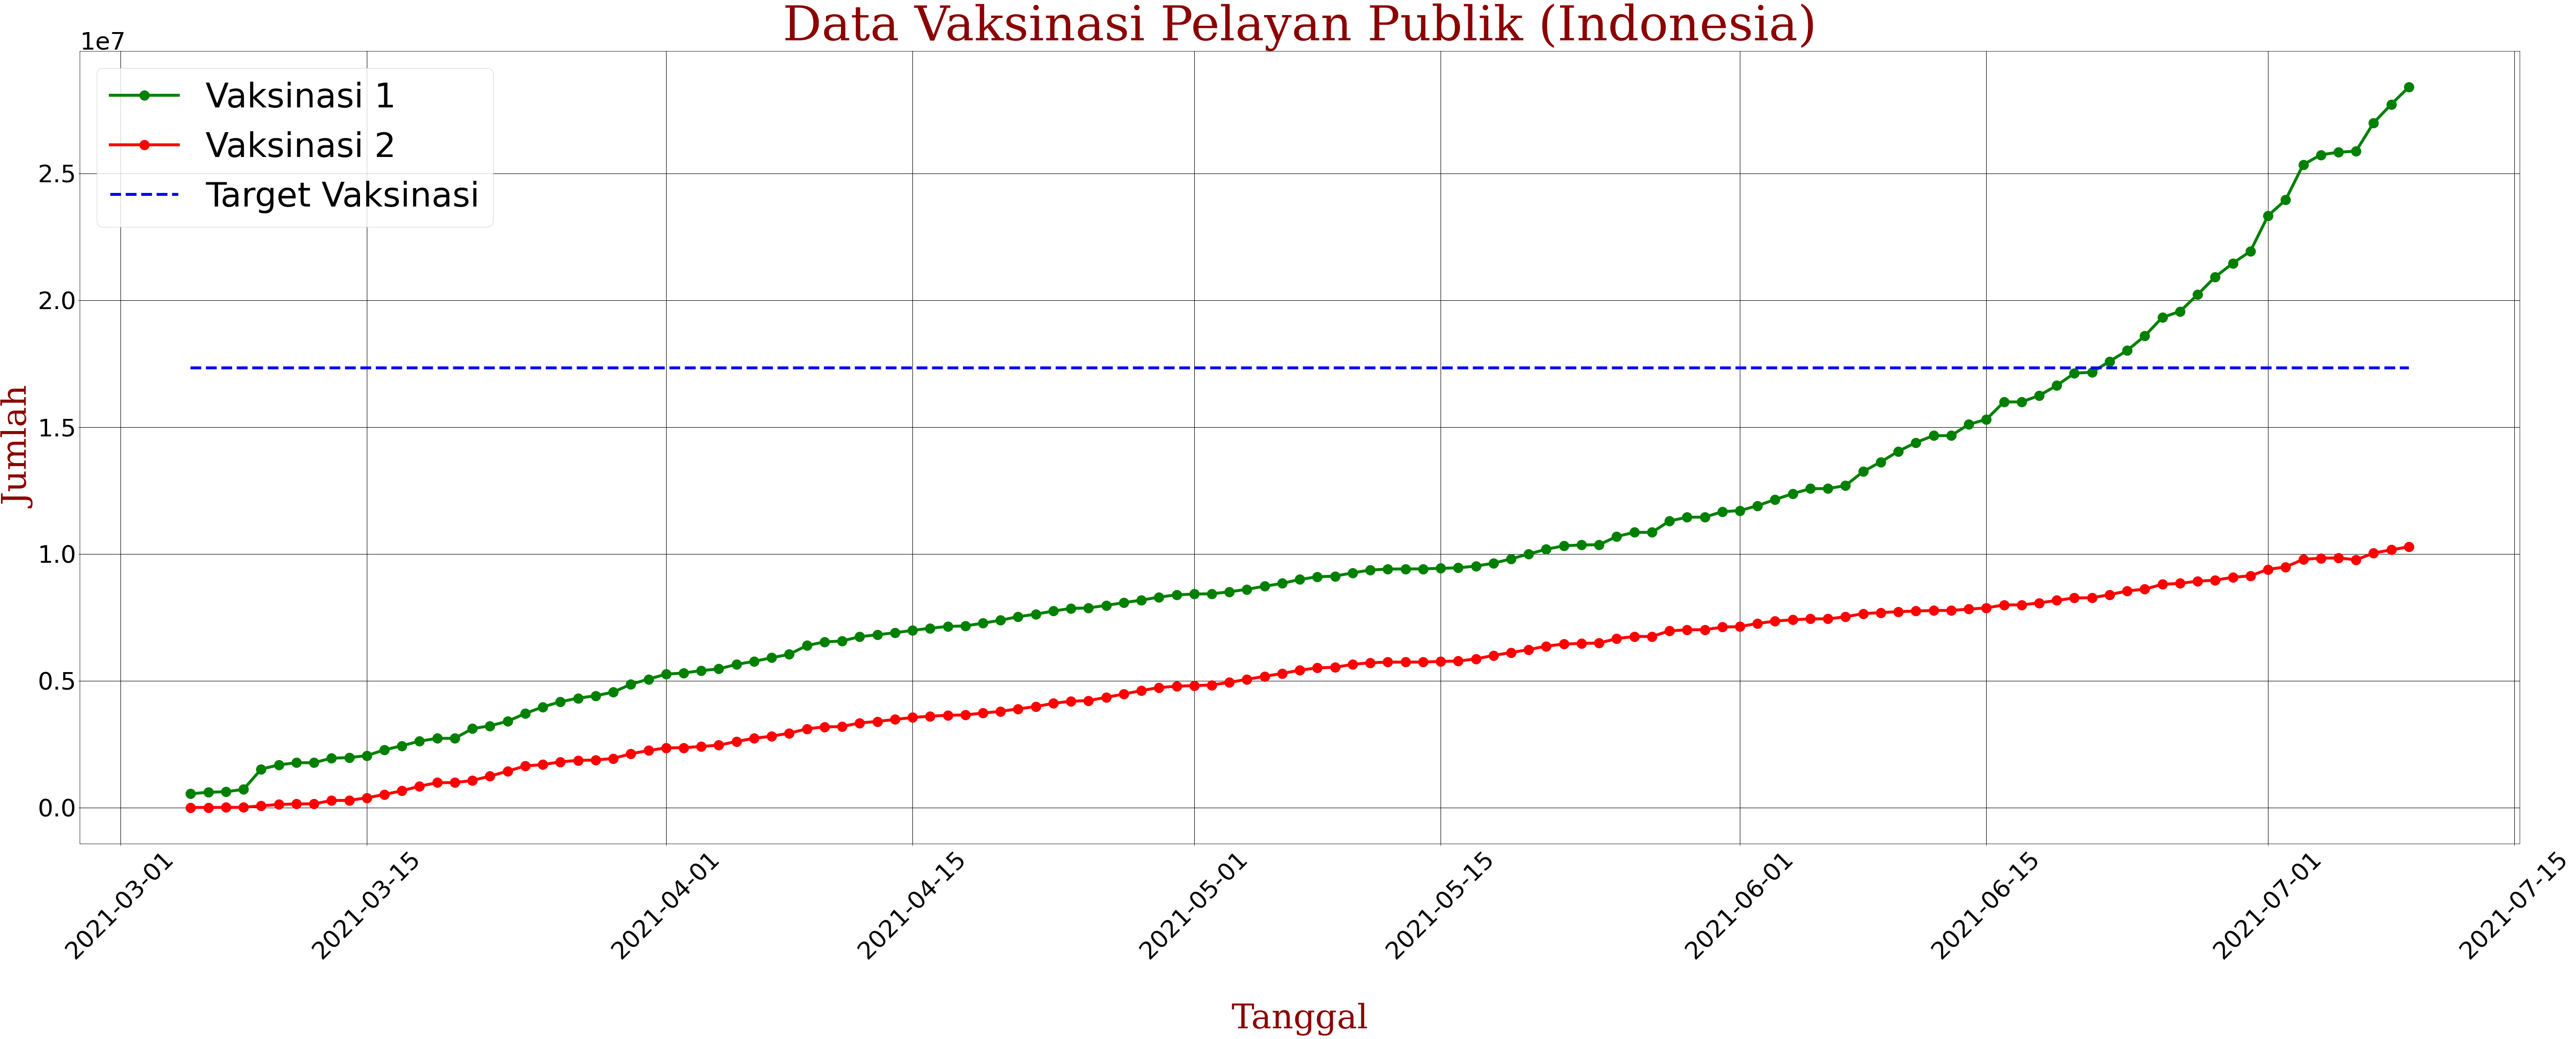

In [27]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

fig, ax = plt.subplots(figsize=(90,30))
ax.plot(df_pp['Vaksinasi 1'],label = 'Vaksinasi 1',marker="o",markersize=20,color='g',linewidth=6)
ax.plot(df_pp['Vaksinasi 2'],label = 'Vaksinasi 2',marker="o",markersize=20,color='r',linewidth=6)
ax.plot(df_pp['Target Vaksinasi'],label = 'Target Vaksinasi',linestyle='--',color='b',linewidth=6)
plt.setp(ax.get_xticklabels(), rotation = 45,fontsize=50)
plt.setp(ax.get_yticklabels(),fontsize=50)
ax.yaxis.offsetText.set_fontsize(50)
ax.legend(prop={'size': 70})
plt.title('Data Vaksinasi Pelayan Publik (Indonesia)',fontsize=100,fontdict=font)
plt.xlabel('\nTanggal',size = 70,fontdict=font)
plt.ylabel('Jumlah',size = 70,fontdict=font)
ax.grid(linewidth=1,color='black',b=True)

In [28]:
df_total_indo = df.iloc[4:,48:53]
df_total_indo.columns = df.iloc[3,48:53]
df_total_indo = df_total_indo.set_index(df_tanggal)
df_total_indo

3          Target Vaksinasi Vaksinasi 1 Vaksinasi 2 Persentase 1 Persentase 2
Tanggal                                                                      
2021-03-05         40349051     2413615     1114537     0.059818     0.027622
2021-03-06         40349051     2552265     1130524     0.063255     0.028019
2021-03-07         40349051     2888757     1133787     0.071594     0.028099
2021-03-08         40349051     3098025     1158432     0.076781      0.02871
2021-03-09         40349051     3337026     1197772     0.082704     0.029685
2021-03-10         40349051     3572519     1249822      0.08854     0.030975
2021-03-11         40349051     3696059     1295615     0.091602      0.03211
2021-03-12         40349051     3696059     1295615     0.091602      0.03211
2021-03-13         40349051     3985596     1454836     0.098778     0.036056
2021-03-14         40349051     4020124     1460222     0.099634      0.03619
2021-03-15         40349051     4166862     1572786      0.10327      0.03898
2021-03-16         40349051     4468829     1716747     0.110754     0.042547
2021-03-17         40349051     4705248     1876140     0.116614     0.046498
2021-03-18         40349051     4959063     2068400     0.122904     0.051263
2021-03-19         40349051     5124948     2221200     0.127015      0.05505
2021-03-20         40349051     5124948     2221200     0.127015      0.05505
2021-03-21         40349051     5567280     2312596     0.137978     0.057315
2021-03-22         40349051     5683199     2491550     0.140851      0.06175
2021-03-23         40349051     5978251     2709545     0.148163     0.067153
2021-03-24         40349051     6389837     2941016     0.158364     0.072889
2021-03-25         40349051     6730456     3015190     0.166806     0.074728
2021-03-26         40349051     6990082     3152612      0.17324     0.078133
2021-03-27         40349051     7136337     3223782     0.176865     0.079897
2021-03-28         40349051     7251039     3246809     0.179708     0.080468
2021-03-29         40349051     7435851     3330639     0.184288     0.082546
2021-03-30         40349051     7840024     3561192     0.194305      0.08826
2021-03-31         40349051     8115714     3717081     0.201138     0.092123
2021-04-01         40349051     8371577     3854451     0.207479     0.095528
2021-04-02         40349051     8424729     3867762     0.208796     0.095858
2021-04-03         40349051     8544910     3954343     0.211775     0.098003
2021-04-04         40349051     8629182     4014401     0.213863     0.099492
2021-04-05         40349051     8856373     4230800     0.219494     0.104855
2021-04-06         40349051     9021106     4431504     0.223577     0.109829
2021-04-07         40349051     9196299     4554695     0.227919     0.112882
2021-04-08         40349051     9373590     4697396     0.232313     0.116419
2021-04-09         40349051     9808744     4952219     0.243097     0.122734
2021-04-10         40349051    10002327     5079048     0.247895     0.125878
2021-04-11         40349051    10048814     5101921     0.249047     0.126445
2021-04-12         40349051    10279346     5322501     0.254761     0.131911
2021-04-13         40349051    10377007     5432855     0.257181     0.134646
2021-04-14         40349051    10481178     5572859     0.259763     0.138116
2021-04-15         40349051    10599742     5715813     0.262701     0.141659
2021-04-16         40349051    10708889     5821888     0.265406     0.144288
2021-04-17         40349051    10803824     5890790     0.267759     0.145996
2021-04-18         40349051    10827994     5911343     0.268358     0.146505
2021-04-19         40349051    10971604     6052612     0.271917     0.150006
2021-04-20         40349051    11115514     6158748     0.275484     0.152637
2021-04-21         40349051    11301555     6341931     0.280095     0.157177
2021-04-22         40349051    11431972     6488197     0.283327     0.160802
2021-04-23         403

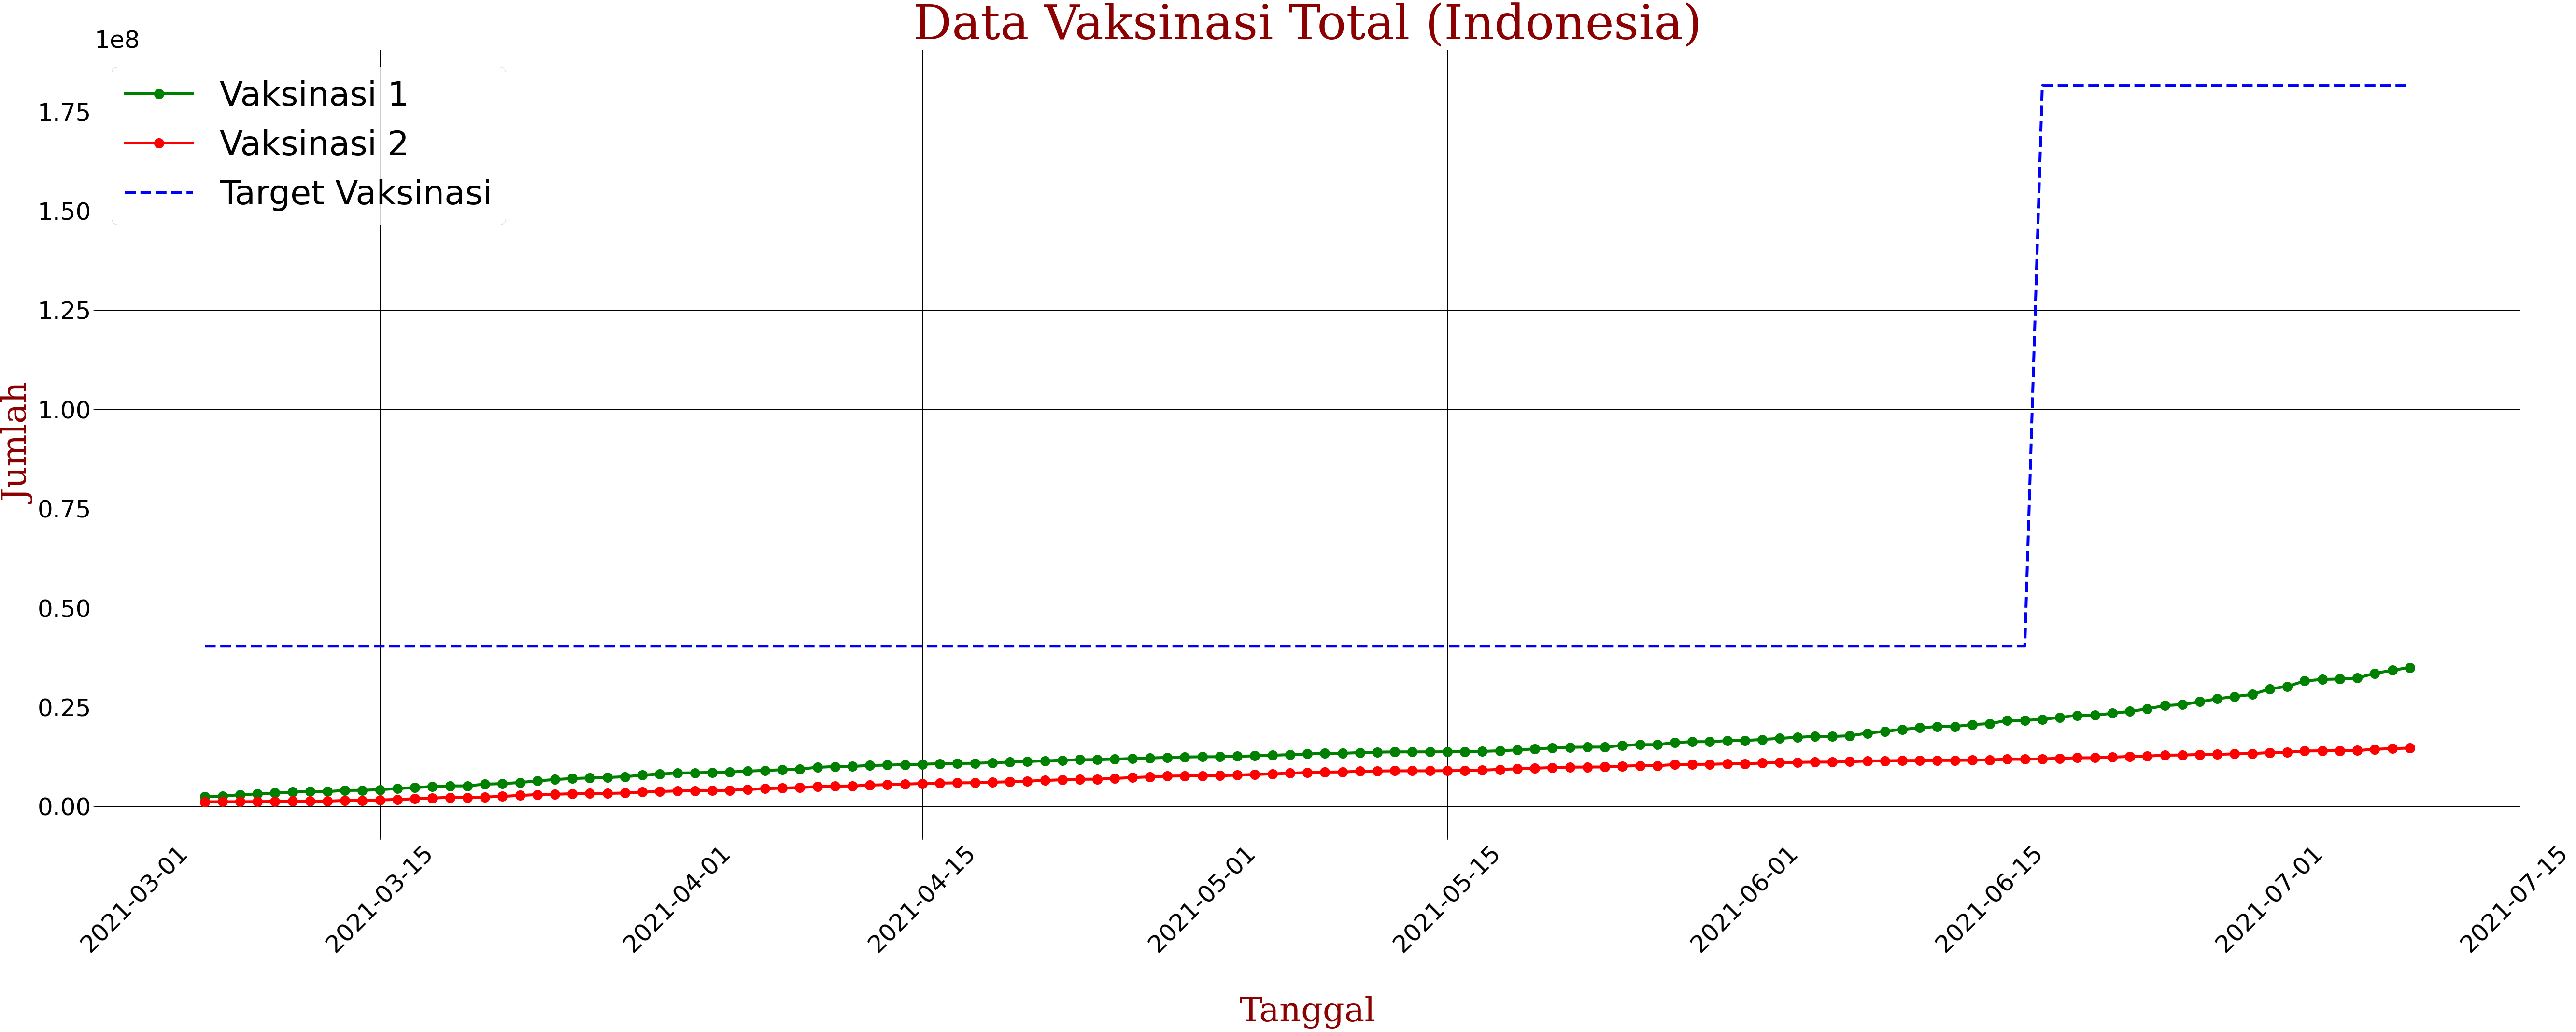

In [29]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

fig, ax = plt.subplots(figsize=(90,30))
ax.plot(df_total_indo['Vaksinasi 1'],label = 'Vaksinasi 1',marker="o",markersize=20,color='g',linewidth=6)
ax.plot(df_total_indo['Vaksinasi 2'],label = 'Vaksinasi 2',marker="o",markersize=20,color='r',linewidth=6)
ax.plot(df_total_indo['Target Vaksinasi'],label = 'Target Vaksinasi',linestyle='--',color='b',linewidth=6)
plt.setp(ax.get_xticklabels(), rotation = 45,fontsize=50)
plt.setp(ax.get_yticklabels(),fontsize=50)
ax.yaxis.offsetText.set_fontsize(50)
ax.legend(prop={'size': 70})
plt.title('Data Vaksinasi Total (Indonesia)',fontsize=100,fontdict=font)
plt.xlabel('\nTanggal',size = 70,fontdict=font)
plt.ylabel('Jumlah',size = 70,fontdict=font)
ax.grid(linewidth=1,color='black',b=True)

In [30]:
df_1859thindo = df.iloc[109:,55:60]
df_1859thindo.columns = df.iloc[3,55:60]
df_1859thindo = df_1859thjkt.set_index(df_tanggal.iloc[105:])
df_1859thindo

3          Target Vaksinasi Vaksinasi 1 Vaksinasi 2 Persentase 1 Persentase 2
Tanggal                                                                      
2021-06-18          7903526     2644205     1345724      0.33456     0.170269
2021-06-19          7903526     2749208     1351050     0.347846     0.170943
2021-06-20          7903526     2789050     1351484     0.352887     0.170998
2021-06-21          7903526     2804191     1351982     0.354803     0.171061
2021-06-22          7903526     2917358     1356385     0.369121     0.171618
2021-06-23          7903526     2997505     1359535     0.379262     0.172016
2021-06-24          7903526     3157797     1363294     0.399543     0.172492
2021-06-25          7903526     3288442     1367060     0.416073     0.172968
2021-06-26          7903526     3422602     1372008     0.433047     0.173594
2021-06-27          7903526     3482082     1375957     0.440573     0.174094
2021-06-28          7903526     3505132     1377641      0.44349     0.174307
2021-06-29          7903526     3633085     1382389     0.459679     0.174908
2021-06-30          7903526     3765772     1384972     0.476467     0.175235
2021-07-01          7903526     3897692     1389577     0.493159     0.175817
2021-07-02          7903526     4003127     1393841     0.506499     0.176357
2021-07-03          7903526     4080842     1396532     0.516332     0.176697
2021-07-04          7903526     4199487     1399996     0.531343     0.177136
2021-07-05          7903526     4215155     1400584     0.533326      0.17721
2021-07-06          7903526     4290114     1402830      0.54281     0.177494
2021-07-07          7903526     4436232     1407819     0.561298     0.178125
2021-07-08          7903526     4516412     1409848     0.571443     0.178382
2021-07-09          7903526     4705939     1415222     0.595423     0.179062

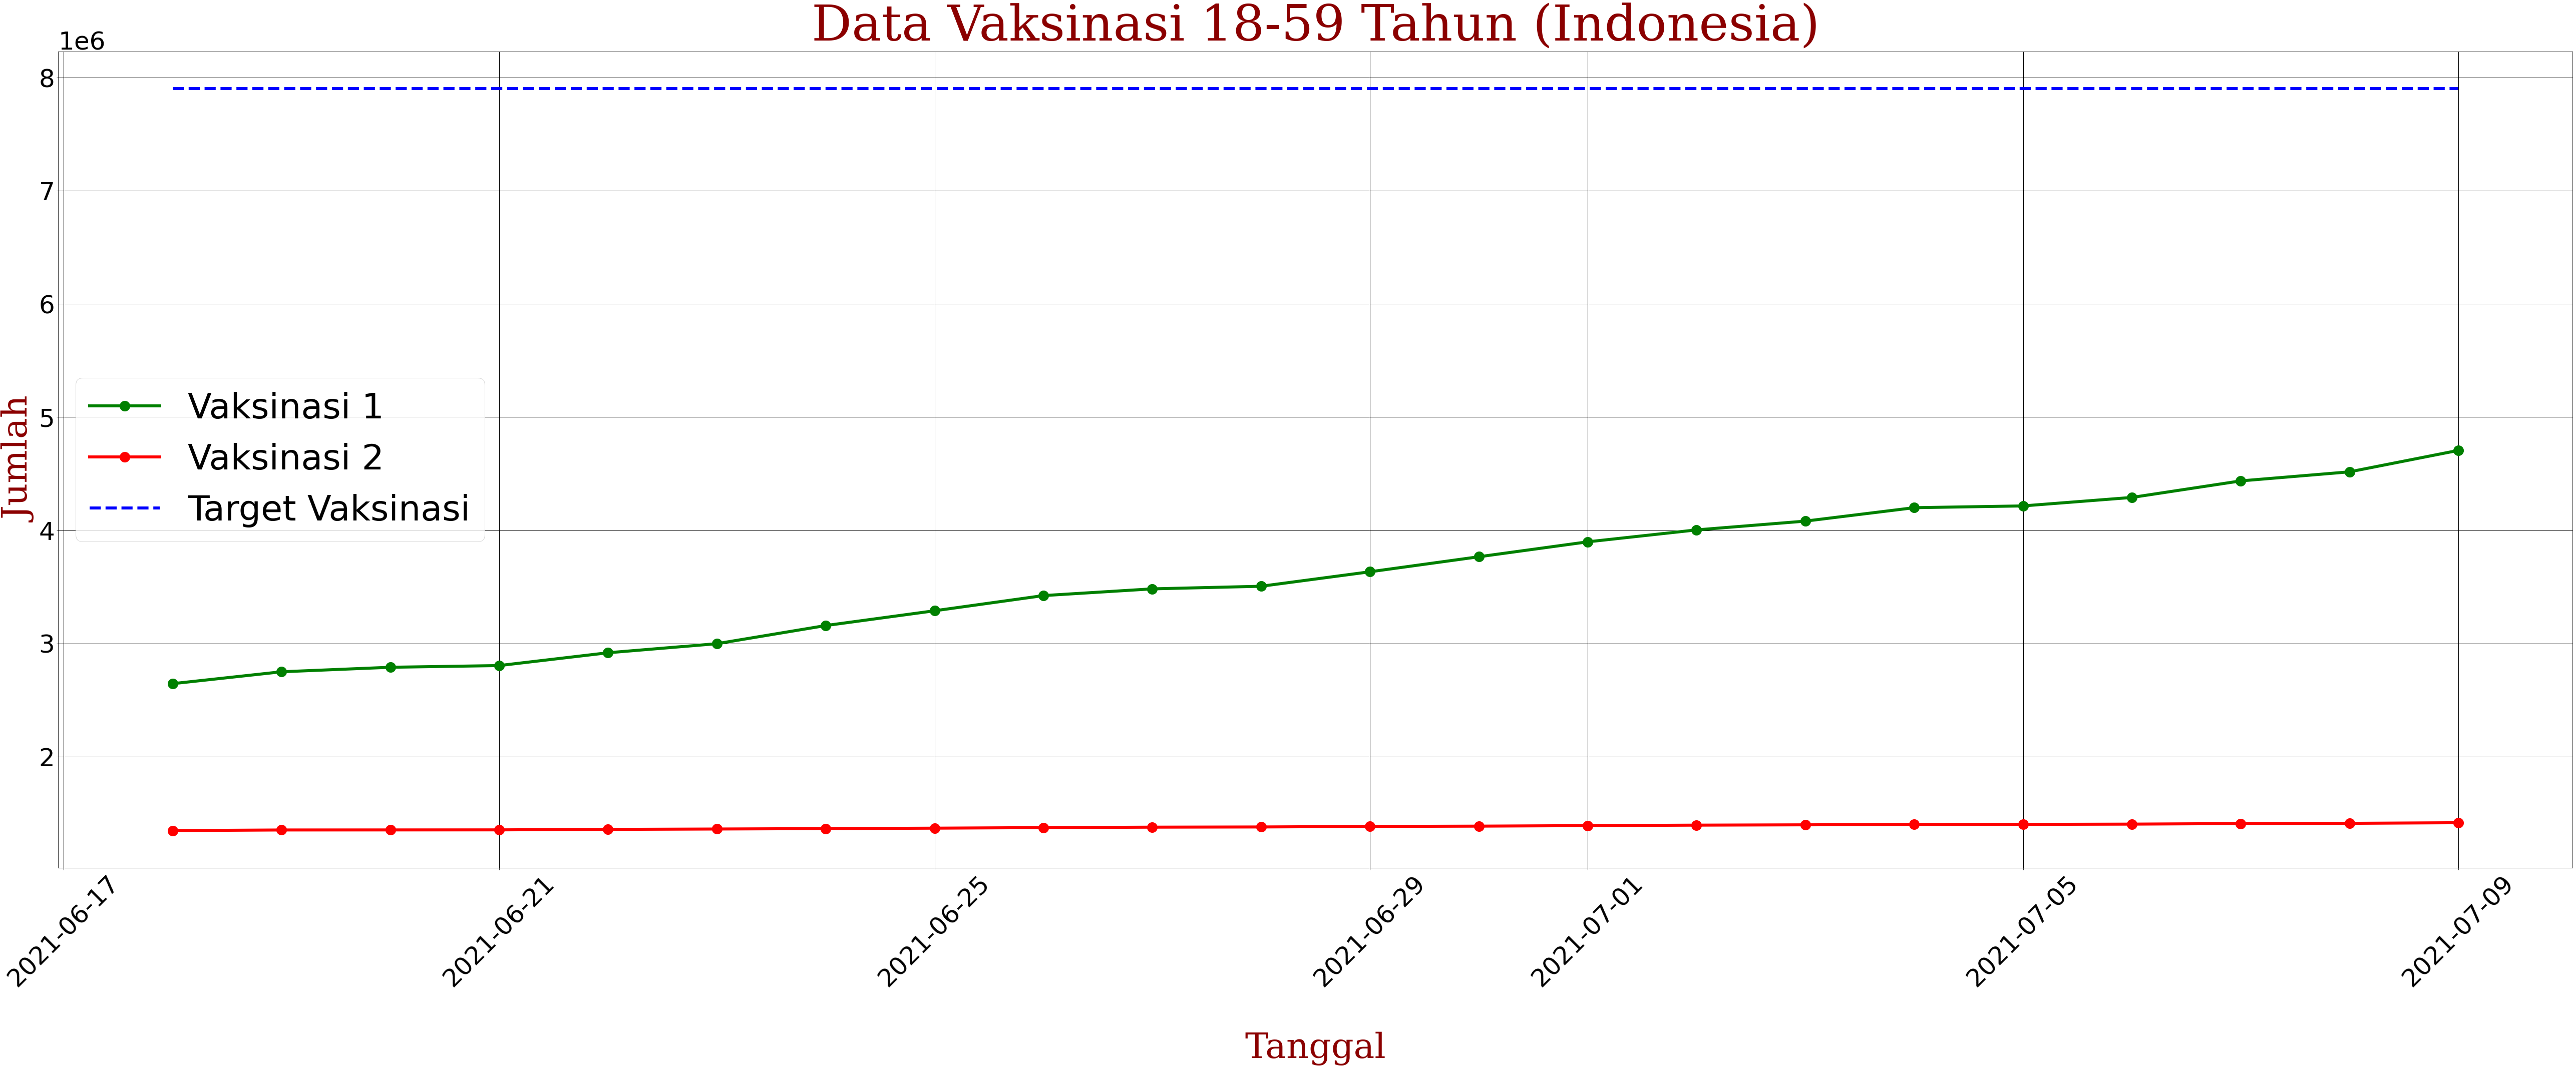

In [31]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

fig, ax = plt.subplots(figsize=(90,30))
ax.plot(df_1859thindo['Vaksinasi 1'],label = 'Vaksinasi 1',marker="o",markersize=20,color='g',linewidth=6)
ax.plot(df_1859thindo['Vaksinasi 2'],label = 'Vaksinasi 2',marker="o",markersize=20,color='r',linewidth=6)
ax.plot(df_1859thindo['Target Vaksinasi'],label = 'Target Vaksinasi',linestyle='--',color='b',linewidth=6)
plt.setp(ax.get_xticklabels(), rotation = 45,fontsize=50)
plt.setp(ax.get_yticklabels(),fontsize=50)
ax.yaxis.offsetText.set_fontsize(50)
ax.legend(prop={'size': 70})
plt.title('Data Vaksinasi 18-59 Tahun (Indonesia)',fontsize=100,fontdict=font)
plt.xlabel('\nTanggal',size = 70,fontdict=font)
plt.ylabel('Jumlah',size = 70,fontdict=font)
ax.grid(linewidth=1,color='black',b=True)

In [32]:
df_1217thindo = df.iloc[122:,60:65]
df_1217thindo.columns = df.iloc[3,60:65]
df_1217thindo = df_1217thindo.set_index(df_tanggal.iloc[118:])
df_1217thindo = df_1217thindo.astype(str) 
df_1217thindo

3          Target Vaksinasi Vaksinasi 1 Vaksinasi 2     Persentase 1  \
Tanggal                                                                
2021-07-01            31245         682           0     0.0218274924   
2021-07-02            31246         683           0    0.02185879793   
2021-07-03            31247         684           0    0.02189010145   
2021-07-04            31248         685           0    0.02192140297   
2021-07-05         40913333       12962           0  0.0003168160365   
2021-07-06         40913334       12962           0  0.0003168160287   
2021-07-07         40913335       36724           0  0.0008976046563   
2021-07-08         40913336       45406           0   0.001109809281   
2021-07-09         40913337       82784           0   0.002023398874   

3          Persentase 2  
Tanggal                  
2021-07-01            0  
2021-07-02            0  
2021-07-03            0  
2021-07-04            0  
2021-07-05            0  
2021-07-06            0  
2021-07-07            0  
2021-07-08            0  
2021-07-09            0

In [41]:
df_1217thindo[['Target Vaksinasi','Vaksinasi 1','Vaksinasi 2']] = df_1217thindo[['Target Vaksinasi','Vaksinasi 1','Vaksinasi 2']].apply(pd.to_numeric)

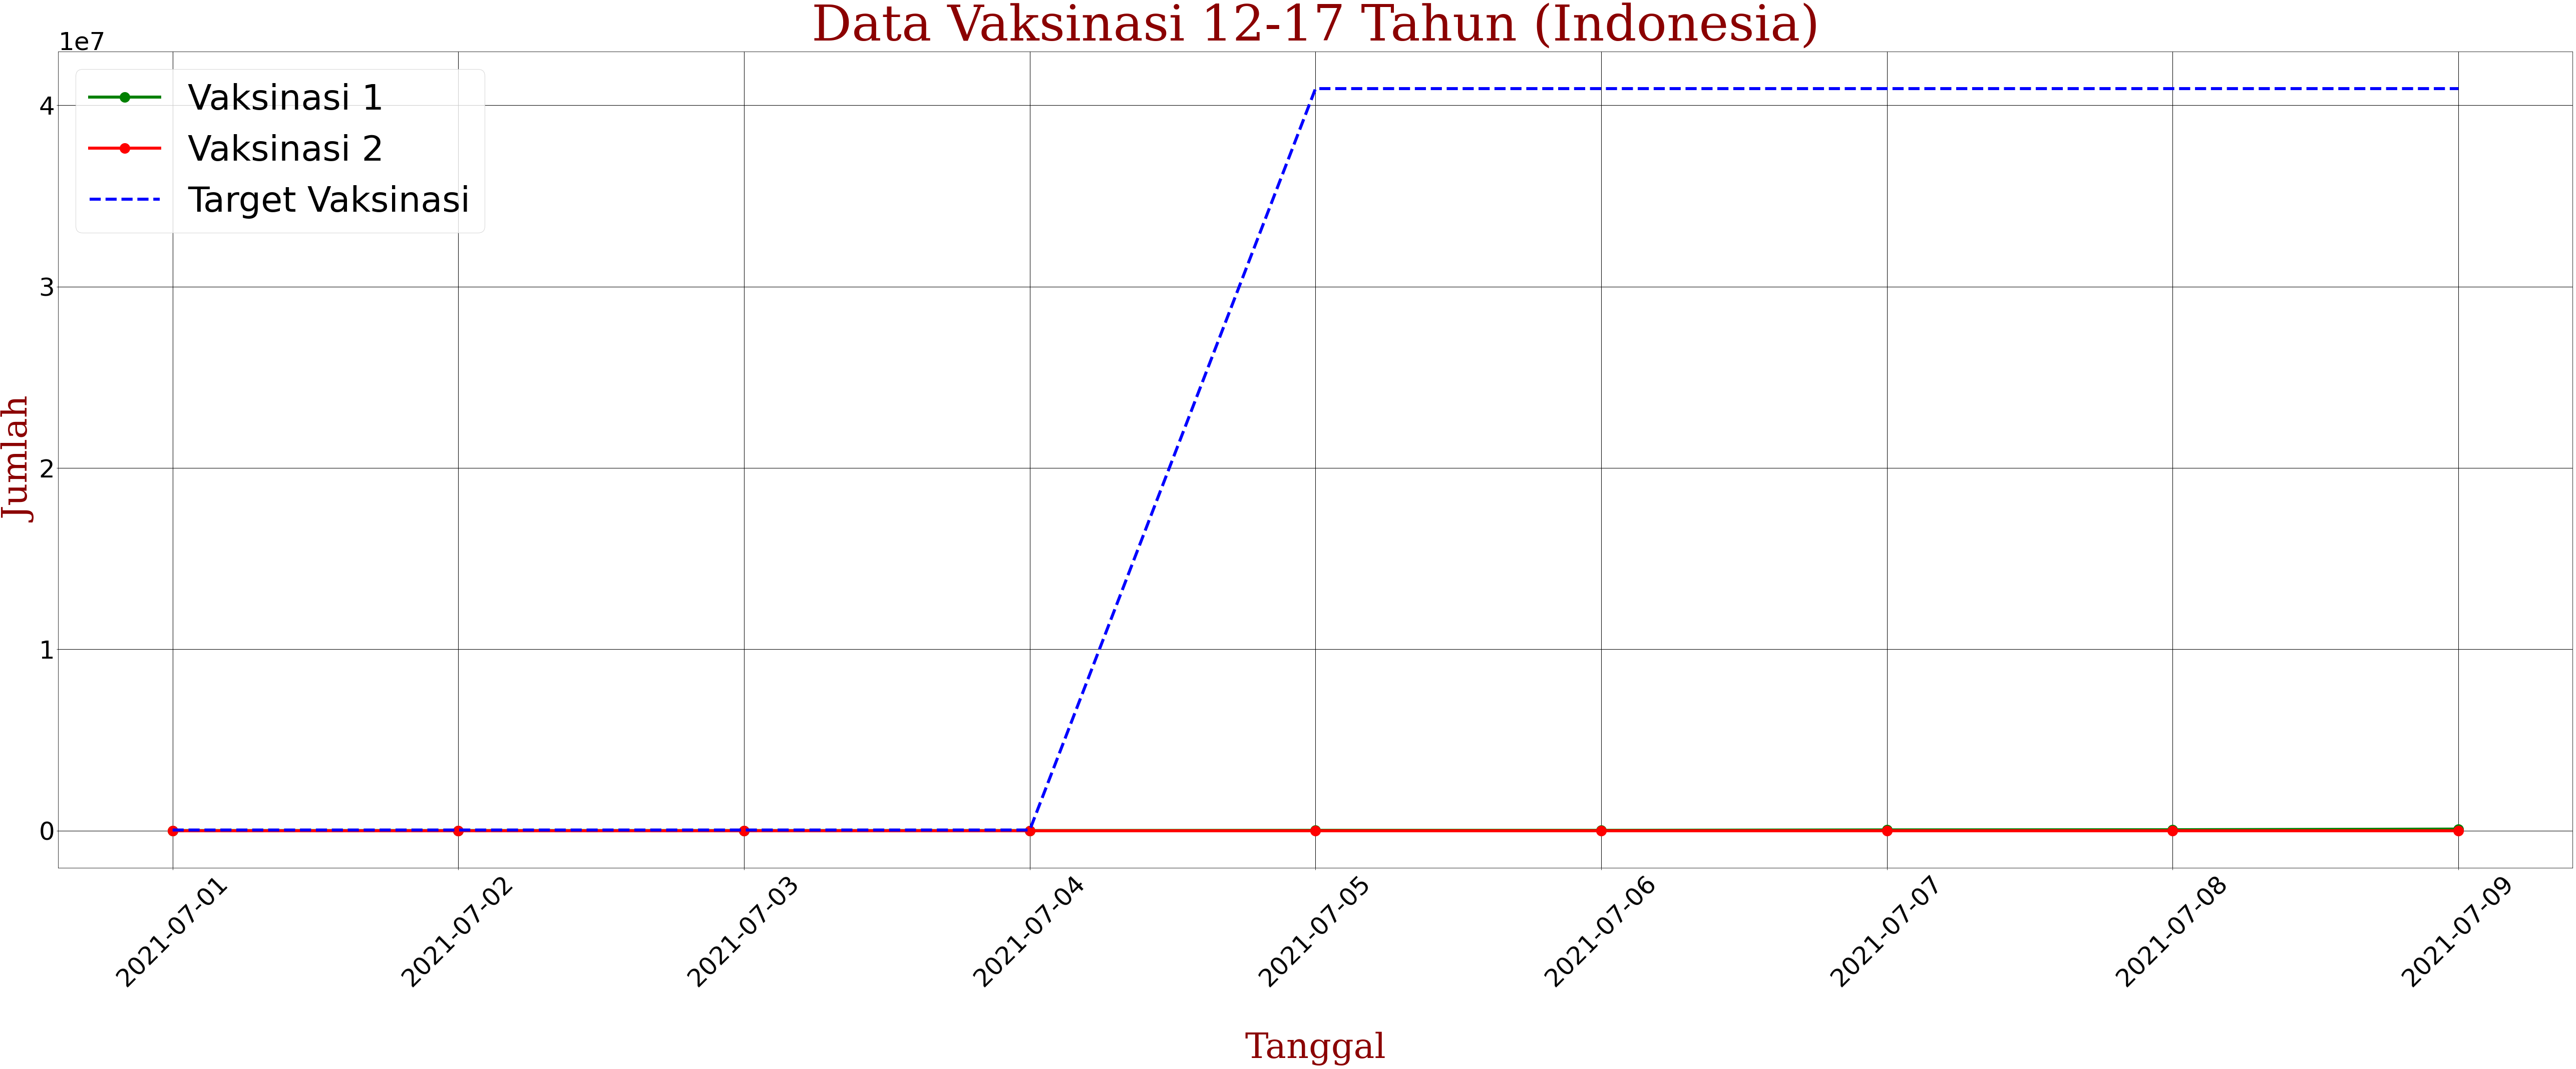

In [42]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

fig, ax = plt.subplots(figsize=(90,30))
ax.plot(df_1217thindo['Vaksinasi 1'],label = 'Vaksinasi 1',marker="o",markersize=20,color='g',linewidth=6)
ax.plot(df_1217thindo['Vaksinasi 2'],label = 'Vaksinasi 2',marker="o",markersize=20,color='r',linewidth=6)
ax.plot(df_1217thindo['Target Vaksinasi'],label = 'Target Vaksinasi',linestyle='--',color='b',linewidth=6)
plt.setp(ax.get_xticklabels(), rotation = 45,fontsize=50)
plt.setp(ax.get_yticklabels(),fontsize=50)
ax.yaxis.offsetText.set_fontsize(50)
ax.legend(prop={'size': 70})
plt.title('Data Vaksinasi 12-17 Tahun (Indonesia)',fontsize=100,fontdict=font)
plt.xlabel('\nTanggal',size = 70,fontdict=font)
plt.ylabel('Jumlah',size = 70,fontdict=font)
ax.grid(linewidth=1,color='black',b=True)

In [37]:
df_1217thindo

3           Target Vaksinasi Vaksinasi 1 Vaksinasi 2     Persentase 1  \
Tanggal                                                                 
2021-07-01             31245         682           0     0.0218274924   
2021-07-02             31246         683           0    0.02185879793   
2021-07-03             31247         684           0    0.02189010145   
2021-07-04             31248         685           0    0.02192140297   
2021-07-05          40913333       12962           0  0.0003168160365   
2021-07-06          40913334       12962           0  0.0003168160287   
2021-07-07          40913335       36724           0  0.0008976046563   
2021-07-08          40913336       45406           0   0.001109809281   
2021-07-09          40913337       82784           0   0.002023398874   

3          Persentase 2  
Tanggal                  
2021-07-01            0  
2021-07-02            0  
2021-07-03            0  
2021-07-04            0  
2021-07-05            0  
2021-07-06            0  
2021-07-07            0  
2021-07-08            0  
2021-07-09            0